# Weather Prediction Model
- Edwin Peraza
- Max Lebda
- Cade Duncan

## Setup
This setup is based on the book

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

IMAGES_PATH = Path("..") / "reports" / "figures"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# Define the save_fig function
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    print(f"Saving figure to {path}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Importing the Data
We are importing a dataset from Redivis. For local use it might request authentication with Redivis.

In [2]:
import redivis
import pandas as pd
import matplotlib.pyplot as plt

user = redivis.user("cdpdemo")
dataset = user.dataset("climate_change_earth_surface_temperature_data:1e0a:v1_0")
table = dataset.table("global_temperatures_by_major_city:7x6x")

# Load table as a dataframe
df = table.to_pandas_dataframe()
df.head()

/opt/anaconda3/envs/CPSC-483/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


dt  AverageTemperature  AverageTemperatureUncertainty  City  \
0  1926-10-01              21.425                          0.437  Cali   
1  1967-03-01               22.05                          0.343  Cali   
2  1910-06-01              21.577                          0.461  Cali   
3  1913-05-01              21.109                          0.502  Cali   
4  1888-10-01              21.432                          1.062  Cali   

    Country Latitude Longitude  
0  Colombia    4.02N    76.34W  
1  Colombia    4.02N    76.34W  
2  Colombia    4.02N    76.34W  
3  Colombia    4.02N    76.34W  
4  Colombia    4.02N    76.34W

## Visualising the Data

### Visualizing the Change in Temperature Around the World
From the same dataset we import the table with information of temperatures of the world

In [3]:
table_global = dataset.table("global_temperatures:5yc3")

global_df = table_global.to_pandas_dataframe()
global_df.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1802-05-01                  10.457                               1.82   
1  1785-12-01                   1.873                              1.909   
2  1840-11-01                   4.101                              0.982   
3  1825-01-01                   3.213                              1.913   
4  1816-06-01                   11.79                              1.087   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                <NA>                           <NA>                <NA>   
1                <NA>                           <NA>                <NA>   
2                <NA>                           <NA>                <NA>   
3                <NA>                           <NA>                <NA>   
4                <NA>                           <NA>                <NA>   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                           <NA>                            <NA>   
1                           <NA>                            <NA>   
2                           <NA>                            <NA>   
3                           <NA>                            <NA>   
4                           <NA>                            <NA>   

   LandAndOceanAverageTemperatureUncertainty  
0                                       <NA>  
1                                       <NA>  
2                                       <NA>  
3                                       <NA>  
4                                       <NA>

In [4]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype               
---  ------                                     --------------  -----               
 0   dt                                         3192 non-null   date32[day][pyarrow]
 1   LandAverageTemperature                     3180 non-null   double[pyarrow]     
 2   LandAverageTemperatureUncertainty          3180 non-null   double[pyarrow]     
 3   LandMaxTemperature                         1992 non-null   double[pyarrow]     
 4   LandMaxTemperatureUncertainty              1992 non-null   double[pyarrow]     
 5   LandMinTemperature                         1992 non-null   double[pyarrow]     
 6   LandMinTemperatureUncertainty              1992 non-null   double[pyarrow]     
 7   LandAndOceanAverageTemperature             1992 non-null   double[pyarrow]     
 8   LandAndOceanAverageTemperatureUncertain

Saving figure to ../reports/figures/Land_and_Ocean_Average_Temperature_Over_Time.png


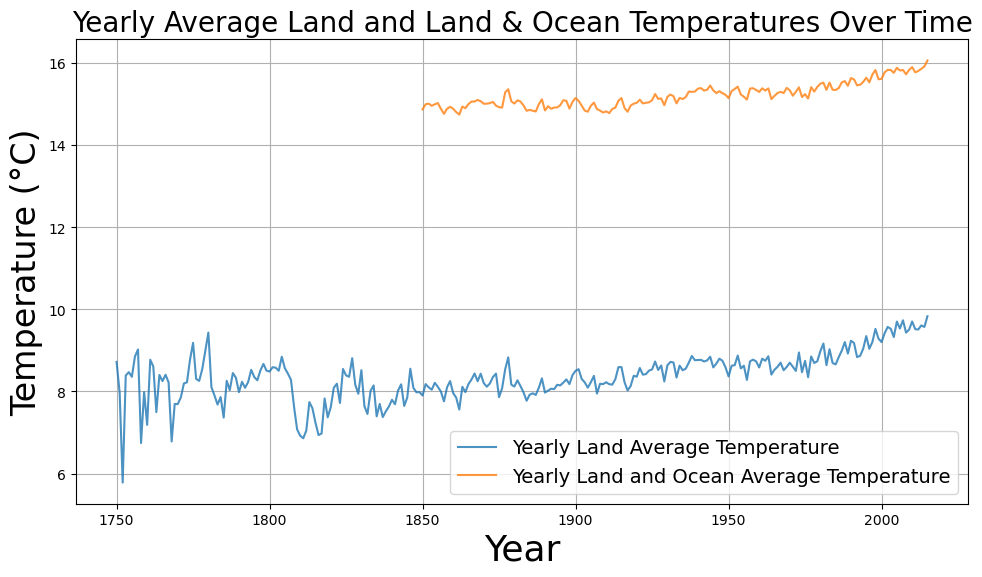

In [46]:
global_df['dt'] = pd.to_datetime(global_df['dt'])
# Extract the year from the date and add it as a new column
global_df['year'] = global_df['dt'].dt.year

# Group by year and calculate the mean temperature for each year
yearly_avg_temp = global_df.groupby('year')[['LandAverageTemperature', 'LandAndOceanAverageTemperature']].mean().reset_index()

# Plotting the yearly averaged Land and Land & Ocean Temperatures
plt.figure(figsize=(10, 6))

# Plot Land Average Temperature
plt.plot(yearly_avg_temp['year'], yearly_avg_temp['LandAverageTemperature'], label='Yearly Land Average Temperature', alpha=0.8)

# Plot Land and Ocean Average Temperature
plt.plot(yearly_avg_temp['year'], yearly_avg_temp['LandAndOceanAverageTemperature'], label='Yearly Land and Ocean Average Temperature', alpha=0.8)

# Adding titles and labels
plt.title('Yearly Average Land and Land & Ocean Temperatures Over Time', fontsize=20)
plt.xlabel('Year', fontsize=26)
plt.ylabel('Temperature (°C)', fontsize=24)
plt.legend(fontsize=14)
plt.grid(True)

# Show the plot
save_fig("Land_and_Ocean_Average_Temperature_Over_Time")
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype               
---  ------                         --------------   -----               
 0   dt                             239177 non-null  date32[day][pyarrow]
 1   AverageTemperature             228175 non-null  double[pyarrow]     
 2   AverageTemperatureUncertainty  228175 non-null  double[pyarrow]     
 3   City                           239177 non-null  string[pyarrow]     
 4   Country                        239177 non-null  string[pyarrow]     
 5   Latitude                       239177 non-null  string[pyarrow]     
 6   Longitude                      239177 non-null  string[pyarrow]     
dtypes: date32[day][pyarrow](1), double[pyarrow](2), string[pyarrow](4)
memory usage: 14.2 MB


In [4]:
df.shape

(239177, 7)

In [5]:
df.describe()

dt  AverageTemperature  AverageTemperatureUncertainty
count      239177            228175.0                       228175.0
mean   1910-11-09           18.125969                       0.969343
min    1743-11-01             -26.772                           0.04
25%    1864-02-01               12.71                           0.34
50%    1914-02-01              20.428                          0.592
75%    1963-12-01              25.918                           1.32
max    2013-09-01              38.283                         14.037
std           NaN             10.0248                       0.979644

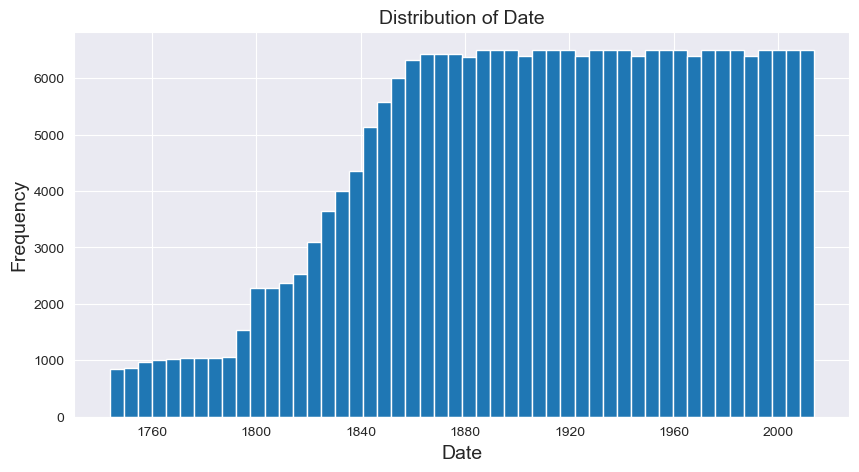

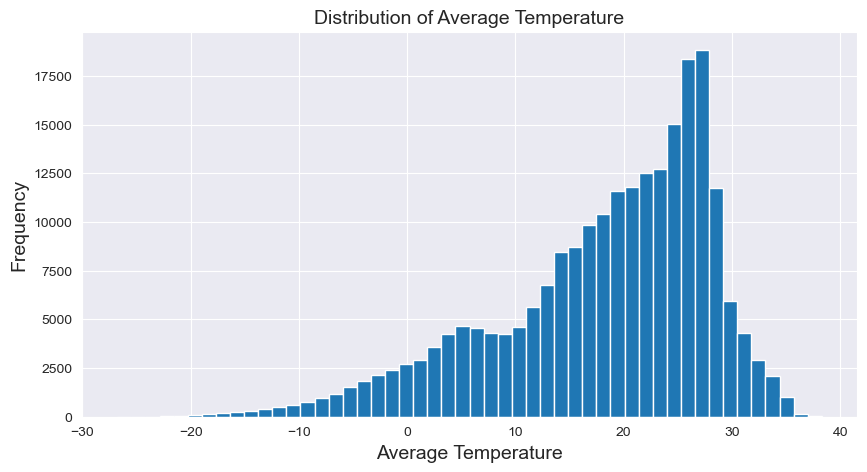

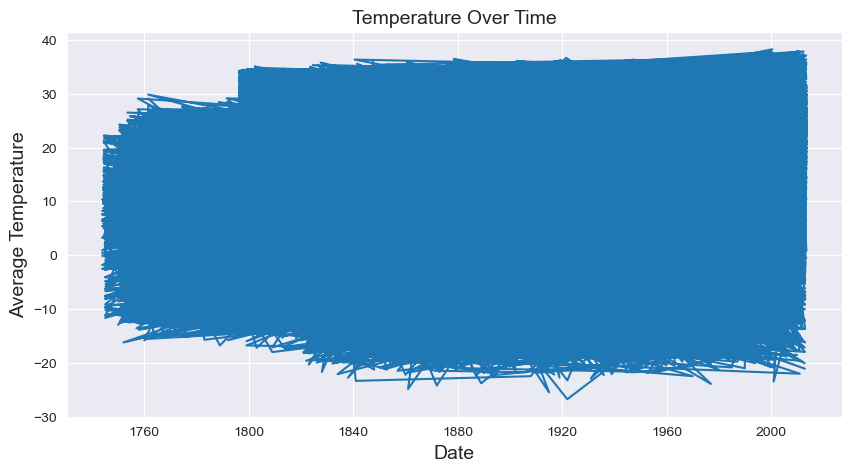

In [6]:
df['dt'].hist(bins=50, figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Date')
plt.show()

df['AverageTemperature'].hist(bins=50, figsize=(10, 5))
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperature')
plt.show()

# Time series visualization for temperatures over time
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(df['dt']), df['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Temperature Over Time')
plt.show()

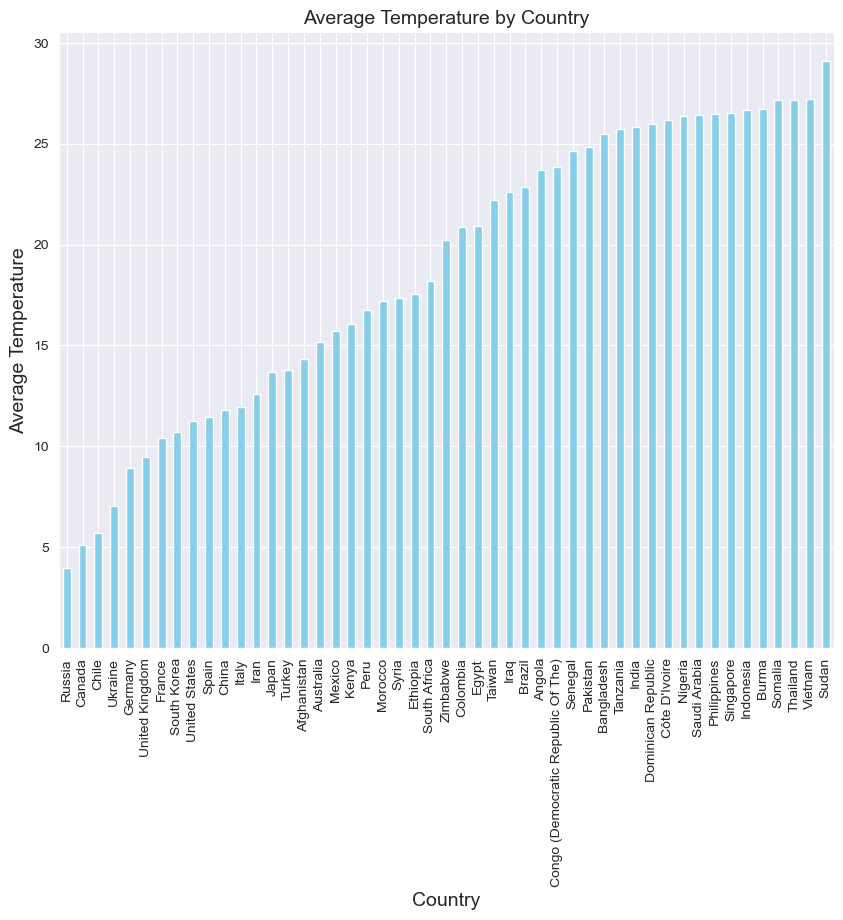

In [7]:
# Group data by country and calculate the mean temperature
country_temp = df.groupby('Country')['AverageTemperature'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 8))
country_temp.plot(kind='bar', color='skyblue')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Country')
plt.xticks(rotation=90)
plt.show()

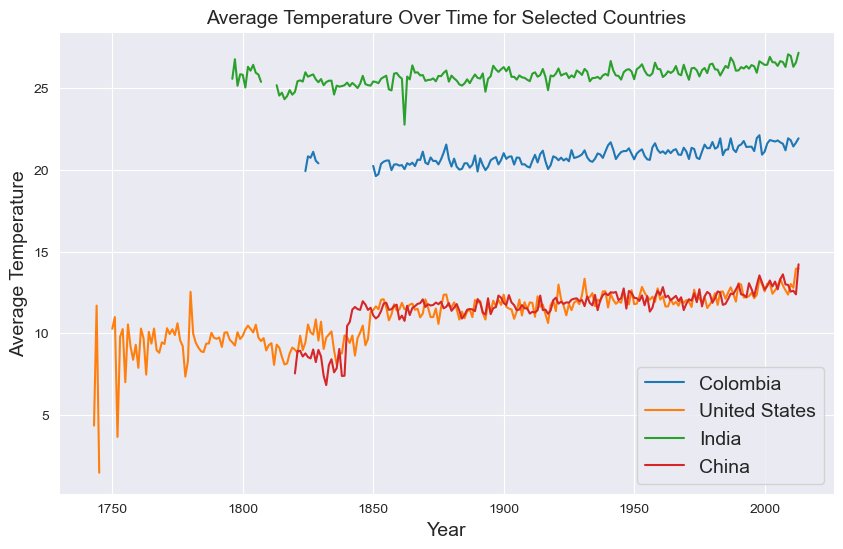

In [8]:
# Select a few countries to compare
selected_countries = ['Colombia', 'United States', 'India', 'China']  # Adjust with the countries you are interested in
df['dt'] = pd.to_datetime(df['dt'])  # Convert dt to datetime format
df['Year'] = df['dt'].dt.year  # Extract the year
df['Month'] = df['dt'].dt.month # Extract the Month
df['Day'] = df['dt'].dt.day  # Extract the day

plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_data = df[df['Country'] == country].groupby('Year')['AverageTemperature'].mean()
    plt.plot(country_data.index, country_data.values, label=country)

plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time for Selected Countries')
plt.legend()
plt.show()

Saving figure to ../reports/figures/Average_Temperature_Uncertainty_Over_Years.png


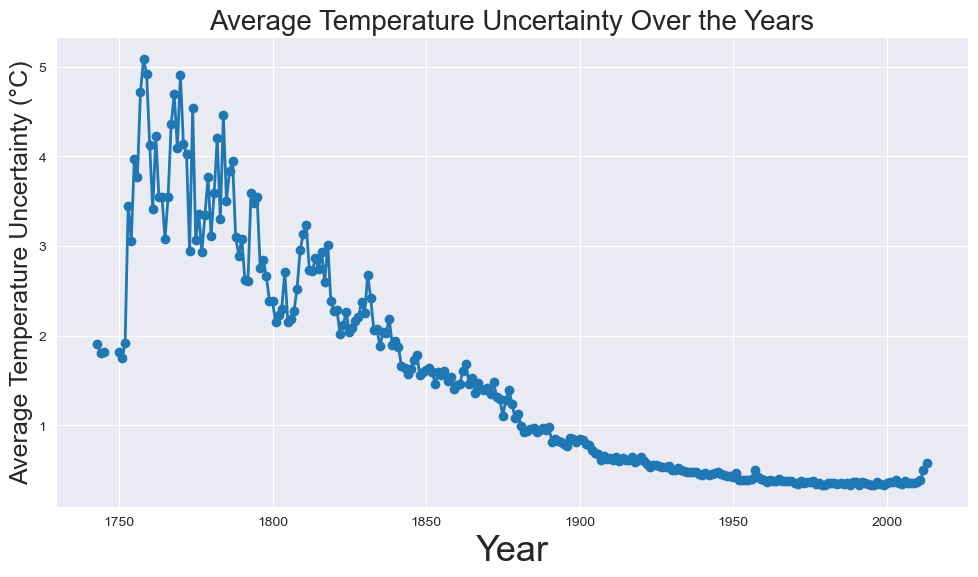

In [9]:
# Group by year and calculate the mean of AverageTemperatureUncertainty
yearly_uncertainty = df.groupby('Year')['AverageTemperatureUncertainty'].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_uncertainty.index, yearly_uncertainty.values, marker='o', linestyle='-', linewidth=2)
plt.title("Average Temperature Uncertainty Over the Years", fontsize=20)
plt.xlabel("Year", fontsize=26)
plt.ylabel("Average Temperature Uncertainty (°C)", fontsize=18)
plt.grid(True)
plt.tight_layout()
save_fig("Average_Temperature_Uncertainty_Over_Years")
plt.show()

## Data Preprocessing
Now we are working back with our main dataset that we are going to be using for the prediction model

In [10]:
df.head()

dt  AverageTemperature  AverageTemperatureUncertainty  City  \
0 1926-10-01              21.425                          0.437  Cali   
1 1967-03-01               22.05                          0.343  Cali   
2 1910-06-01              21.577                          0.461  Cali   
3 1913-05-01              21.109                          0.502  Cali   
4 1888-10-01              21.432                          1.062  Cali   

    Country Latitude Longitude  Year  Month  Day  
0  Colombia    4.02N    76.34W  1926     10    1  
1  Colombia    4.02N    76.34W  1967      3    1  
2  Colombia    4.02N    76.34W  1910      6    1  
3  Colombia    4.02N    76.34W  1913      5    1  
4  Colombia    4.02N    76.34W  1888     10    1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   dt                             239177 non-null  datetime64[ns] 
 1   AverageTemperature             228175 non-null  double[pyarrow]
 2   AverageTemperatureUncertainty  228175 non-null  double[pyarrow]
 3   City                           239177 non-null  string[pyarrow]
 4   Country                        239177 non-null  string[pyarrow]
 5   Latitude                       239177 non-null  string[pyarrow]
 6   Longitude                      239177 non-null  string[pyarrow]
 7   Year                           239177 non-null  int32          
 8   Month                          239177 non-null  int32          
 9   Day                            239177 non-null  int32          
dtypes: datetime64[ns](1), double[pyarrow](2), int32(3), stri

## Filtering Data Before 1870
We chose to remove rows where the `Year` is earlier than 1870. The reasoning behind this decision is:

1. **Data Quality**: Data from earlier years contains many missing or incomplete values, which could reduce the reliability of our model.
2. **Sufficient Data**: Even after removing rows before 1870, the dataset retains plenty of observations to train our model effectively.
3. **Focus on Modern Trends**: By excluding older data, we align our analysis with more recent climate trends, which are likely more relevant and better recorded.

This step ensures that our dataset is both clean and representative of reliable climate records, improving the overall quality of the analysis.

In [12]:
# Number of rows before filtering
initial_rows = len(df)

# Remove rows where the year is before 1870
df = df[df['Year'] >= 1870]

# Count rows removed due to the year filter
rows_removed_year = initial_rows - len(df)

# Remove rows with missing values
df = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

# Count rows removed due to missing values
rows_removed_na = initial_rows - rows_removed_year - len(df)

# Total rows removed
total_removed = rows_removed_year + rows_removed_na

# Print information about removed rows
print(f"Number of rows removed (Year < 1870): {rows_removed_year}")
print(f"Number of rows removed (Missing temperature data): {rows_removed_na}")
print(f"Total number of rows removed: {total_removed}")
print(f"Number of rows remaining: {len(df)}")

# Display the first few rows of the cleaned dataframe
df.info()

Number of rows removed (Year < 1870): 66811
Number of rows removed (Missing temperature data): 1241
Total number of rows removed: 68052
Number of rows remaining: 171125
<class 'pandas.core.frame.DataFrame'>
Index: 171125 entries, 0 to 228173
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   dt                             171125 non-null  datetime64[ns] 
 1   AverageTemperature             171125 non-null  double[pyarrow]
 2   AverageTemperatureUncertainty  171125 non-null  double[pyarrow]
 3   City                           171125 non-null  string[pyarrow]
 4   Country                        171125 non-null  string[pyarrow]
 5   Latitude                       171125 non-null  string[pyarrow]
 6   Longitude                      171125 non-null  string[pyarrow]
 7   Year                           171125 non-null  int32          
 8   Month                         

In [13]:
df.describe()

dt  AverageTemperature  \
count                         171125            171125.0   
mean   1942-04-14 09:55:31.354273280           18.870181   
min              1870-01-01 00:00:00             -26.772   
25%              1906-09-01 00:00:00              13.958   
50%              1942-05-01 00:00:00               21.21   
75%              1978-01-01 00:00:00              26.238   
max              2013-09-01 00:00:00              38.283   
std                              NaN            9.700779   

       AverageTemperatureUncertainty           Year          Month       Day  
count                       171125.0  171125.000000  171125.000000  171125.0  
mean                        0.574956    1941.827226       6.491226       1.0  
min                             0.04    1870.000000       1.000000       1.0  
25%                            0.297    1906.000000       3.000000       1.0  
50%                            0.441    1942.000000       6.000000       1.0  
75%                            0.713    1978.000000       9.000000       1.0  
max                            4.998    2013.000000      12.000000       1.0  
std                         0.417209      41.237217       3.450092       0.0

In [14]:
df.shape

(171125, 10)

### Finding Correlation

In [15]:
# Function to convert latitude and longitude into numeric
def convert_lat_lon(value):
    if value[-1] in ['N', 'E']:
        return float(value[:-1])  # North and East are positive
    else:
        return -float(value[:-1])  # South and West are negative

# Apply the function to Latitude and Longitude columns, only if needed
if df['Latitude'].dtype != 'float64' and df['Latitude'].dtype != 'int64':
    df['Latitude'] = df['Latitude'].apply(convert_lat_lon)
if df['Longitude'].dtype != 'float64' and df['Longitude'].dtype != 'int64':
    df['Longitude'] = df['Longitude'].apply(convert_lat_lon)
    
# Count how many are NaN (not a number) after conversion
latitude_nan_count = df['Latitude'].isna().sum()
longitude_nan_count = df['Longitude'].isna().sum()

# Count how many rows are NaN
average_nan_count = df['AverageTemperature'].isna().sum()
averageUncertainty_nan_count = df['AverageTemperature'].isna().sum()

# Print the counts of invalid rows
print(f"Number of invalid (NaN) Latitude values: {latitude_nan_count}")
print(f"Number of invalid (NaN) Longitude values: {longitude_nan_count}")
print(f"Number of invalid (NaN) Average Temperature values: {average_nan_count}")
print(f"Number of invalid (NaN) Average Temperature values: {averageUncertainty_nan_count}")

# Keep only the numeric columns
correlation_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

correlation_matrix = correlation_df.corr(method="pearson")

# Display the correlation matrix
print(correlation_matrix)

Number of invalid (NaN) Latitude values: 0
Number of invalid (NaN) Longitude values: 0
Number of invalid (NaN) Average Temperature values: 0
Number of invalid (NaN) Average Temperature values: 0
                               AverageTemperature  \
AverageTemperature                       1.000000   
AverageTemperatureUncertainty           -0.036013   
Latitude                                -0.349575   
Longitude                                0.036157   
Year                                     0.042690   
Month                                    0.096640   
Day                                           NaN   

                               AverageTemperatureUncertainty  Latitude  \
AverageTemperature                                 -0.036013 -0.349575   
AverageTemperatureUncertainty                       1.000000 -0.099723   
Latitude                                           -0.099723  1.000000   
Longitude                                          -0.025464  0.168608   
Year      

### Encoding Categorical Variables: Country
To prepare the dataset for machine learning, we need to encode categorical variables into a numerical format. For this dataset, the `Country` column contains categorical values representing different countries. Since machine learning models typically work with numerical data, we will use **one-hot encoding** to transform this variable.

In [16]:
initial_columns = df.shape[1]

# Perform one-hot encoding for the 'Country' column in place
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

# Calculate the number of new columns added
new_columns_added = df.shape[1] - initial_columns

# Print the number of new columns added
print(f"Number of new columns created for 'Country': {new_columns_added}")

df.info()

Number of new columns created for 'Country': 47
<class 'pandas.core.frame.DataFrame'>
Index: 171125 entries, 0 to 228173
Data columns (total 57 columns):
 #   Column                                      Non-Null Count   Dtype          
---  ------                                      --------------   -----          
 0   dt                                          171125 non-null  datetime64[ns] 
 1   AverageTemperature                          171125 non-null  double[pyarrow]
 2   AverageTemperatureUncertainty               171125 non-null  double[pyarrow]
 3   City                                        171125 non-null  string[pyarrow]
 4   Latitude                                    171125 non-null  float64        
 5   Longitude                                   171125 non-null  float64        
 6   Year                                        171125 non-null  int32          
 7   Month                                       171125 non-null  int32          
 8   Day                  

In [17]:
df.head()

dt  AverageTemperature  AverageTemperatureUncertainty  City  \
0 1926-10-01              21.425                          0.437  Cali   
1 1967-03-01               22.05                          0.343  Cali   
2 1910-06-01              21.577                          0.461  Cali   
3 1913-05-01              21.109                          0.502  Cali   
4 1888-10-01              21.432                          1.062  Cali   

   Latitude  Longitude  Year  Month  Day Country_Angola  ... Country_Syria  \
0      4.02     -76.34  1926     10    1          False  ...         False   
1      4.02     -76.34  1967      3    1          False  ...         False   
2      4.02     -76.34  1910      6    1          False  ...         False   
3      4.02     -76.34  1913      5    1          False  ...         False   
4      4.02     -76.34  1888     10    1          False  ...         False   

  Country_Taiwan Country_Tanzania Country_Thailand Country_Turkey  \
0          False            False            False          False   
1          False            False            False          False   
2          False            False            False          False   
3          False            False            False          False   
4          False            False            False          False   

  Country_Ukraine Country_United Kingdom Country_United States  \
0           False                  False                 False   
1           False                  False                 False   
2           False                  False                 False   
3           False                  False                 False   
4           False                  False                 False   

  Country_Vietnam Country_Zimbabwe  
0           False            False  
1           False            False  
2           False            False  
3           False            False  
4           False            False  

[5 rows x 57 columns]

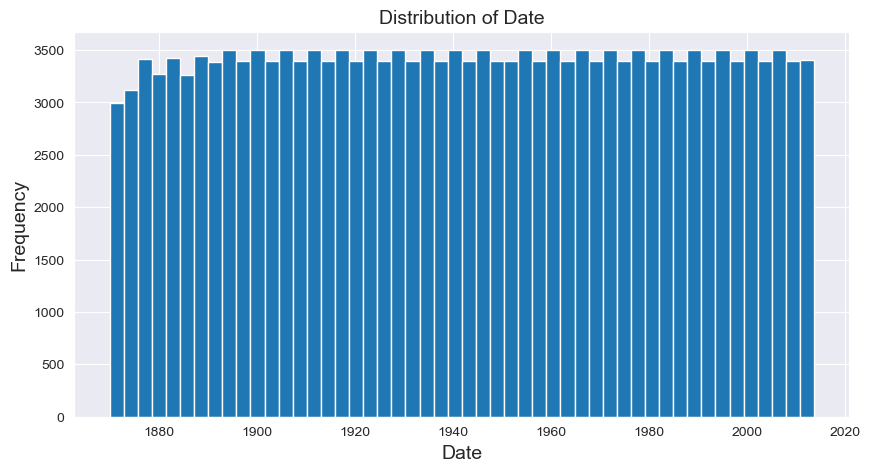

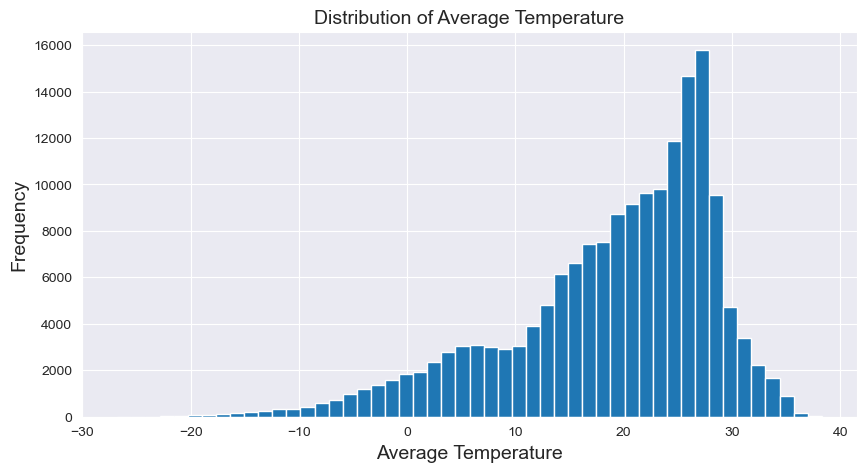

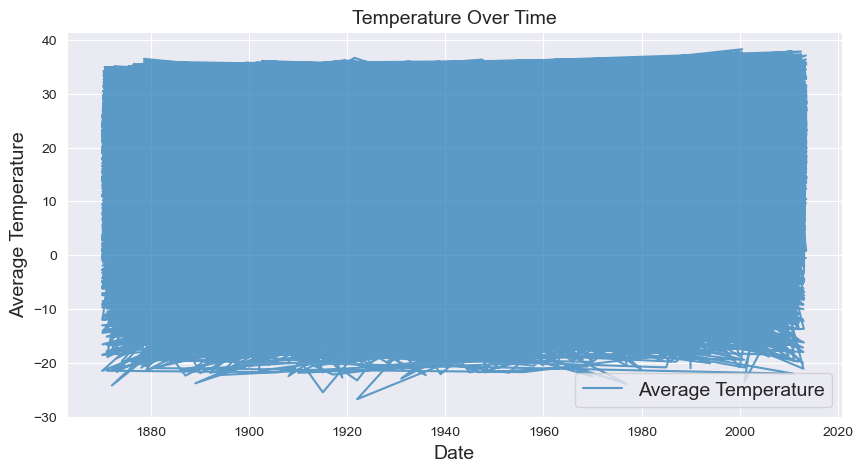

In [18]:
# Histogram for the distribution of dates
df['dt'].hist(bins=50, figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Date')
plt.show()

# Histogram for the distribution of Average Temperature
df['AverageTemperature'].hist(bins=50, figsize=(10, 5))
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperature')
plt.show()

# Time series visualization for Average Temperature over time
plt.figure(figsize=(10, 5))
plt.plot(df['dt'], df['AverageTemperature'], alpha=0.7, label='Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

In [19]:
# Drop the 'City' and 'dt' columns only if they exist
columns_to_drop = ['City', 'dt']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171125 entries, 0 to 228173
Data columns (total 55 columns):
 #   Column                                      Non-Null Count   Dtype          
---  ------                                      --------------   -----          
 0   AverageTemperature                          171125 non-null  double[pyarrow]
 1   AverageTemperatureUncertainty               171125 non-null  double[pyarrow]
 2   Latitude                                    171125 non-null  float64        
 3   Longitude                                   171125 non-null  float64        
 4   Year                                        171125 non-null  int32          
 5   Month                                       171125 non-null  int32          
 6   Day                                         171125 non-null  int32          
 7   Country_Angola                              171125 non-null  bool[pyarrow]  
 8   Country_Australia                           171125 non-null  bool[pya

In [20]:
df.head()

AverageTemperature  AverageTemperatureUncertainty  Latitude  Longitude  \
0              21.425                          0.437      4.02     -76.34   
1               22.05                          0.343      4.02     -76.34   
2              21.577                          0.461      4.02     -76.34   
3              21.109                          0.502      4.02     -76.34   
4              21.432                          1.062      4.02     -76.34   

   Year  Month  Day Country_Angola Country_Australia Country_Bangladesh  ...  \
0  1926     10    1          False             False              False  ...   
1  1967      3    1          False             False              False  ...   
2  1910      6    1          False             False              False  ...   
3  1913      5    1          False             False              False  ...   
4  1888     10    1          False             False              False  ...   

  Country_Syria Country_Taiwan Country_Tanzania Country_Thailand  \
0         False          False            False            False   
1         False          False            False            False   
2         False          False            False            False   
3         False          False            False            False   
4         False          False            False            False   

  Country_Turkey Country_Ukraine Country_United Kingdom Country_United States  \
0          False           False                  False                 False   
1          False           False                  False                 False   
2          False           False                  False                 False   
3          False           False                  False                 False   
4          False           False                  False                 False   

  Country_Vietnam Country_Zimbabwe  
0           False            False  
1           False            False  
2           False            False  
3           False            False  
4           False            False  

[5 rows x 55 columns]

In [21]:
# Initialize a dictionary for model results
model_scores = {}

## Building and Training a Linear Regression Model

Now that we have prepared our dataset, the next step is to build and train a machine learning model. For this section, we will use **Linear Regression**, a simple yet powerful algorithm for predicting continuous values. The target variable is `AverageTemperature`.

### Why Linear Regression?
- **Interpretable**: Linear regression provides coefficients that help explain the relationship between input features and the target variable.
- **Efficient**: It is computationally inexpensive, making it a great starting point for modeling.
- **Baseline Model**: It serves as a strong baseline to compare the performance of more complex models.

#### Selecting Multiple Features
We will start by training a model with multiple features

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

model_name = "Linear Regression M1"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing, use random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model to disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate the loaded model on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the Linear Regression model: {result:.4f}")

R² Score of the Linear Regression model: 0.1391


Visualizing the Results

Saving figure to ../reports/figures/Actual_vs_Predicted_Linear_Regression_M1.png


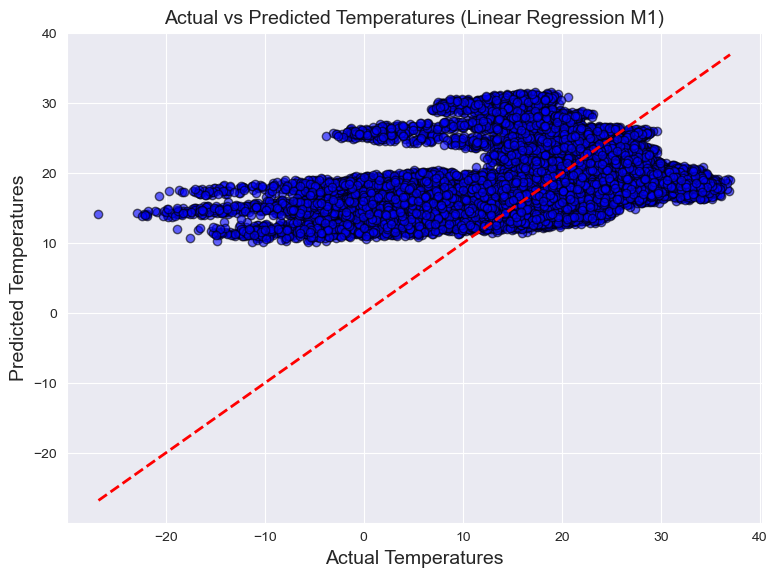

Saving figure to ../reports/figures/Histogram_Linear_Regression_M1.png


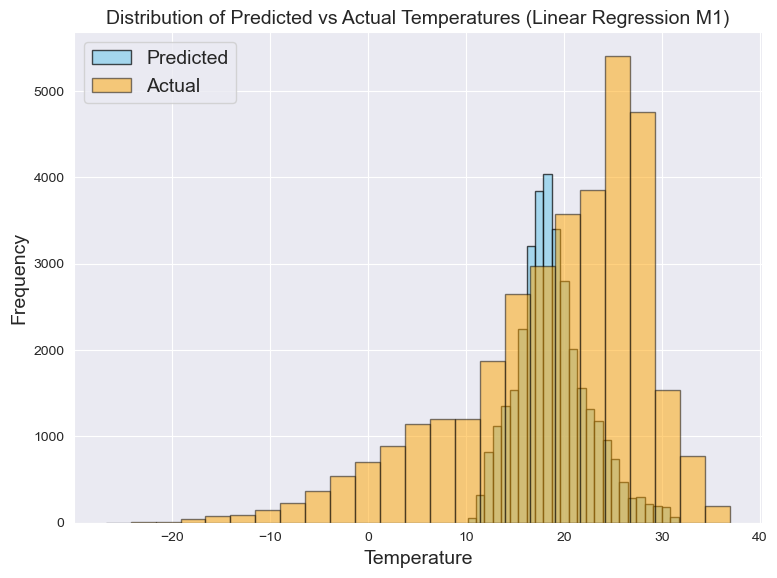

Saving figure to ../reports/figures/Residuals_Linear_Regression_M1.png


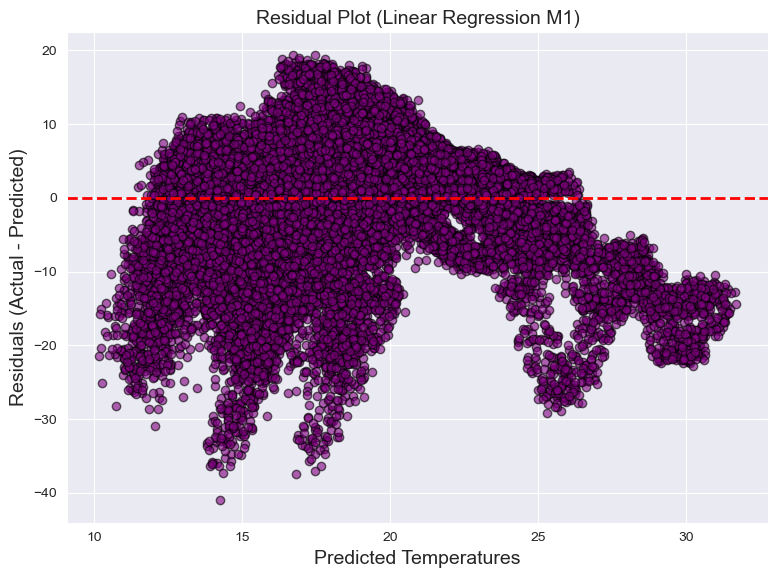

Metrics for Linear Regression M1:
  Mean Absolute Error (MAE): 7.0842
  Median Absolute Error (MedAE): 6.0307
  Mean Squared Error (MSE): 79.7846
  Root Mean Squared Error (RMSE): 8.9322
  R² Score: 0.1391


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Define model name for consistent naming
model_name = "Linear Regression M1"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing, use random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title(f"Actual vs Predicted Temperatures ({model_name})")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.grid(True)
save_fig(f"Actual_vs_Predicted_{model_name.replace(' ', '_')}")
plt.show()

# Plot histogram for predicted temperatures
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=25, alpha=0.7, label="Predicted", color='skyblue', edgecolor='black')
plt.hist(y_test, bins=25, alpha=0.5, label="Actual", color='orange', edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Distribution of Predicted vs Actual Temperatures ({model_name})")
plt.legend()
save_fig(f"Histogram_{model_name.replace(' ', '_')}")
plt.show()

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title(f"Residual Plot ({model_name})")
plt.xlabel("Predicted Temperatures")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
save_fig(f"Residuals_{model_name.replace(' ', '_')}")
plt.show()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
med_ae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

model_scores[model_name] = {
    "MAE": mae,
    "MedAE": med_ae,
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

# Print metrics
print(f"Metrics for {model_name}:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Median Absolute Error (MedAE): {med_ae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R² Score: {r2:.4f}")

#### Selecting fewer features
We will also train the model with fewer features

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

model_name = "Linear Regression M2"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing, use random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model to disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate the loaded model on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the Linear Regression model: {result:.4f}")

R² Score of the Linear Regression model: 0.1292


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_Linear_Regression_M2.png


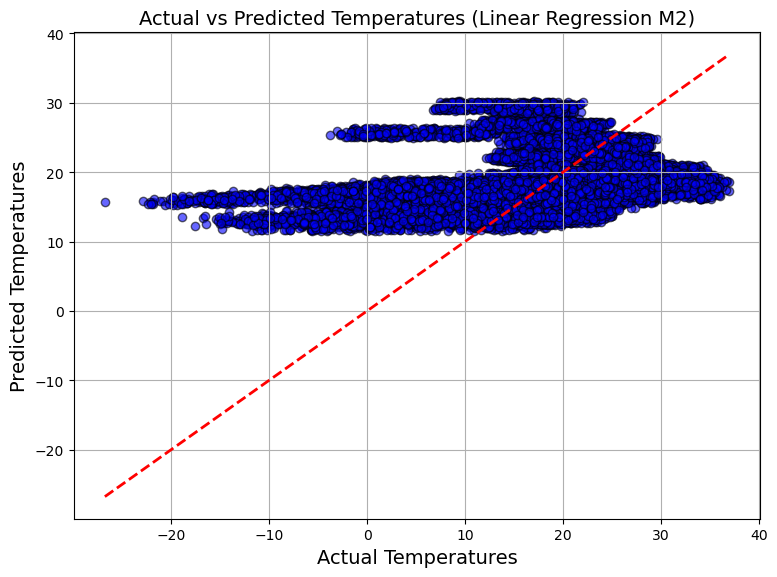

Saving figure to ../reports/figures/Histogram_Linear_Regression_M2.png


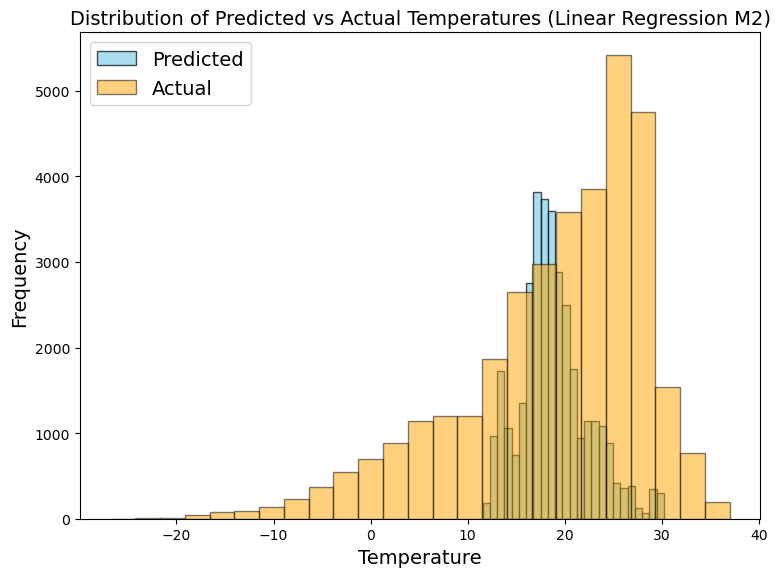

Saving figure to ../reports/figures/Residuals_Linear_Regression_M2.png


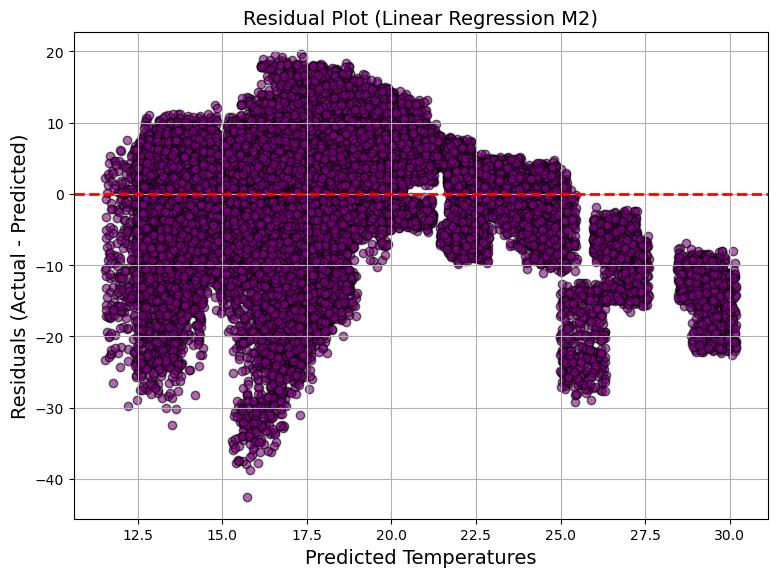

Metrics for Linear Regression M2:
  Mean Absolute Error (MAE): 7.1300
  Median Absolute Error (MedAE): 6.0911
  Mean Squared Error (MSE): 80.7002
  Root Mean Squared Error (RMSE): 8.9833
  R² Score: 0.1292


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import pickle
import matplotlib.pyplot as plt
import numpy as np

model_name = "Linear Regression M2"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing, use random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title(f"Actual vs Predicted Temperatures ({model_name})")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.grid(True)
save_fig(f"Actual_vs_Predicted_{model_name.replace(' ', '_')}")
plt.show()

# Plot histogram for predicted temperatures
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=25, alpha=0.7, label="Predicted", color='skyblue', edgecolor='black')
plt.hist(y_test, bins=25, alpha=0.5, label="Actual", color='orange', edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Distribution of Predicted vs Actual Temperatures ({model_name})")
plt.legend()
save_fig(f"Histogram_{model_name.replace(' ', '_')}")
plt.show()

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title(f"Residual Plot ({model_name})")
plt.xlabel("Predicted Temperatures")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
save_fig(f"Residuals_{model_name.replace(' ', '_')}")
plt.show()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
med_ae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

model_scores[model_name] = {
    "MAE": mae,
    "MedAE": med_ae,
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

# Print metrics
print(f"Metrics for {model_name}:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Median Absolute Error (MedAE): {med_ae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R² Score: {r2:.4f}")

## Building and Training a Random Forest Model

After testing with a Linear Regression model, we will now explore a more advanced machine learning algorithm: **Random Forest**. This algorithm often performs better for complex, nonlinear datasets. The target variable is still `AverageTemperature`.

### Why Random Forest?
- **Handles Nonlinearity**: Random Forest can model nonlinear relationships that Linear Regression cannot capture effectively.
- **Robust to Overfitting**: By averaging predictions across multiple decision trees, it reduces overfitting, especially when hyperparameters are tuned properly.
- **Feature Importance**: Random Forest provides insights into which features are most influential in making predictions.
- **Flexibility**: It works well with a mix of continuous and categorical data.

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

model_name = "Random Forest M1"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing, use random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Default n_estimators is 100

# Fit the model on the training set
model.fit(X_train, y_train)

# Save the model to disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate the loaded model on the test set
result = loaded_model.score(X_test, y_test)  # R² score on the test set
print(f"R² Score of the Random Forest model: {result:.4f}")

R² Score of the Random Forest model: 0.9857


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_Random_Forest_M1.png


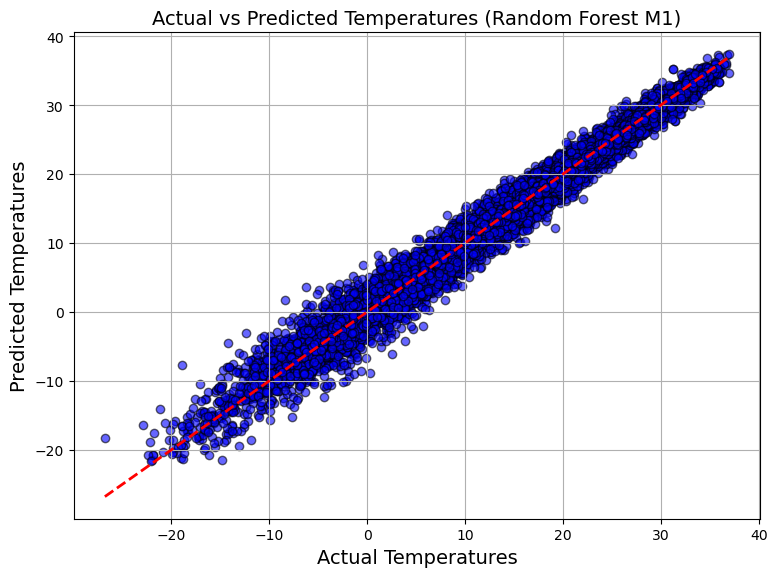

Saving figure to ../reports/figures/Histogram_Random_Forest_M1.png


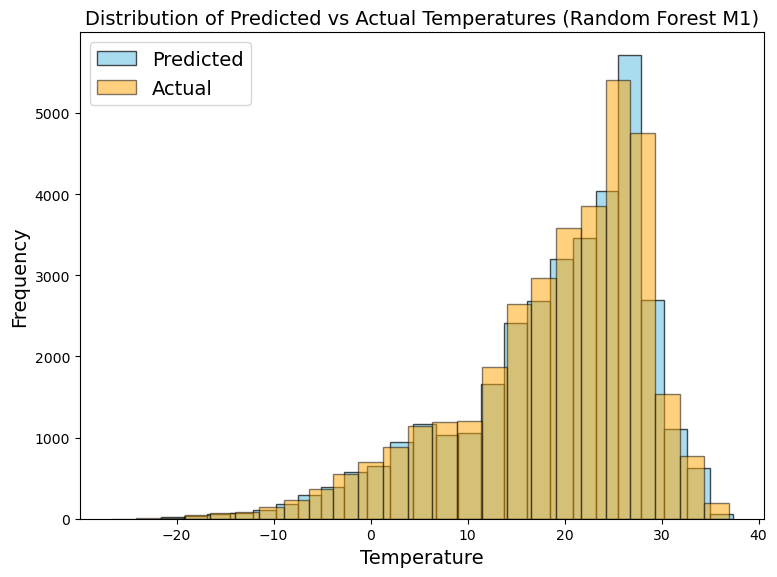

Saving figure to ../reports/figures/Residuals_Random_Forest_M1.png


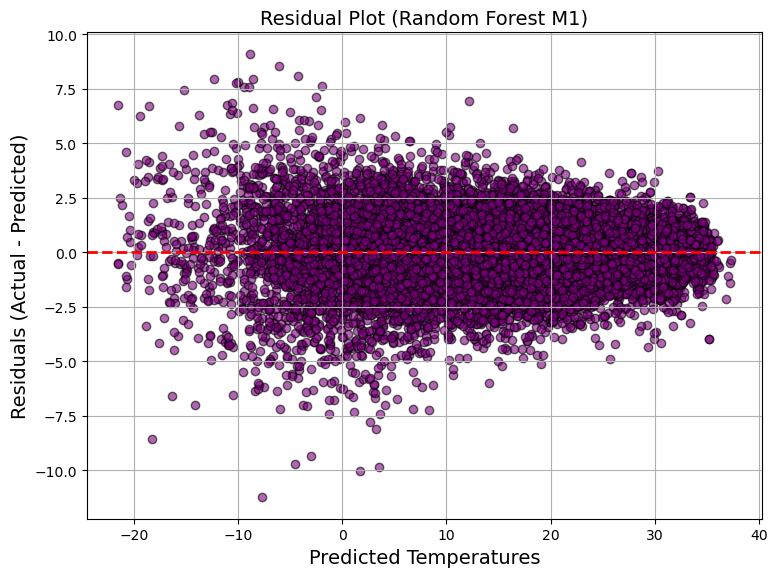

Metrics for Random Forest M1:
  Mean Absolute Error (MAE): 0.7750
  Median Absolute Error (MedAE): 0.5028
  Mean Squared Error (MSE): 1.3258
  Root Mean Squared Error (RMSE): 1.1514
  R² Score: 0.9857


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import pickle
import matplotlib.pyplot as plt
import numpy as np

model_name = "Random Forest M1"

# Define features and target
features = ['Year', 'Latitude', 'Longitude', 'Month']
X = df[features] 
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title(f"Actual vs Predicted Temperatures ({model_name})")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.grid(True)
save_fig(f"Actual_vs_Predicted_{model_name.replace(' ', '_')}")
plt.show()

# Plot histogram for predicted temperatures
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=25, alpha=0.7, label="Predicted", color='skyblue', edgecolor='black')
plt.hist(y_test, bins=25, alpha=0.5, label="Actual", color='orange', edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Distribution of Predicted vs Actual Temperatures ({model_name})")
plt.legend()
save_fig(f"Histogram_{model_name.replace(' ', '_')}")
plt.show()

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title(f"Residual Plot ({model_name})")
plt.xlabel("Predicted Temperatures")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
save_fig(f"Residuals_{model_name.replace(' ', '_')}")
plt.show()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
med_ae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

model_scores[model_name] = {
    "MAE": mae,
    "MedAE": med_ae,
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

# Print metrics
print(f"Metrics for {model_name}:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Median Absolute Error (MedAE): {med_ae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R² Score: {r2:.4f}")

Testing random forest with one hot encoded data

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

model_name = "Random Forest M2"

# Dynamically select all one-hot encoded Country columns
country_columns = [col for col in df.columns if col.startswith('Country_')]

# Define features and target
features = ['Year', 'Latitude', 'Longitude', 'Month'] + country_columns
X = df[features] 
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Default n_estimators is 100

# Fit the model on the training set
model.fit(X_train, y_train)

# Save the model to disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate the loaded model on the test set
result = loaded_model.score(X_test, y_test)  # R² score on the test set
print(f"R² Score of the Random Forest model: {result:.4f}")

R² Score of the Random Forest model: 0.9857


The model does improve slightly by adding the AverageTemperatureUncertainty, but in a real scenario if we were trying to predict the weather we would not have this information in advance.

In [69]:
# Get feature importance from the model
scores = model.feature_importances_
for name, importance in zip(features, scores):
    print(f"{name}: {importance:.4f}")

Year: 0.0133
Latitude: 0.4797
Longitude: 0.0710
Month: 0.3768
Country_Angola: 0.0000
Country_Australia: 0.0000
Country_Bangladesh: 0.0001
Country_Brazil: 0.0004
Country_Burma: 0.0000
Country_Canada: 0.0010
Country_Chile: 0.0028
Country_China: 0.0456
Country_Colombia: 0.0001
Country_Congo (Democratic Republic Of The): 0.0001
Country_Côte D'Ivoire: 0.0000
Country_Dominican Republic: 0.0000
Country_Egypt: 0.0003
Country_Ethiopia: 0.0000
Country_France: 0.0002
Country_Germany: 0.0003
Country_India: 0.0012
Country_Indonesia: 0.0000
Country_Iran: 0.0001
Country_Iraq: 0.0002
Country_Italy: 0.0001
Country_Japan: 0.0001
Country_Kenya: 0.0000
Country_Mexico: 0.0001
Country_Morocco: 0.0003
Country_Nigeria: 0.0000
Country_Pakistan: 0.0005
Country_Peru: 0.0001
Country_Philippines: 0.0000
Country_Russia: 0.0004
Country_Saudi Arabia: 0.0002
Country_Senegal: 0.0002
Country_Singapore: 0.0000
Country_Somalia: 0.0000
Country_South Africa: 0.0001
Country_South Korea: 0.0010
Country_Spain: 0.0001
Country_S

The country features have little to no value in the model

Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_Random_Forest_M2.png


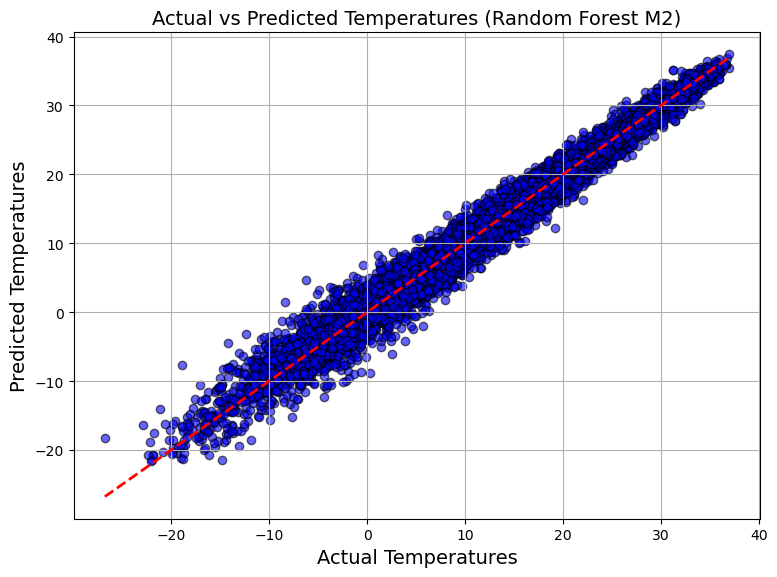

Saving figure to ../reports/figures/Histogram_Random_Forest_M2.png


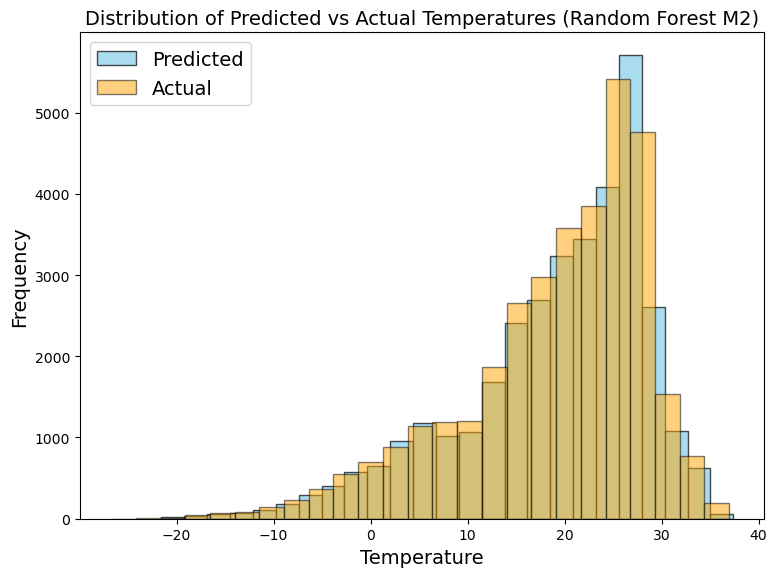

Saving figure to ../reports/figures/Residuals_Random_Forest_M2.png


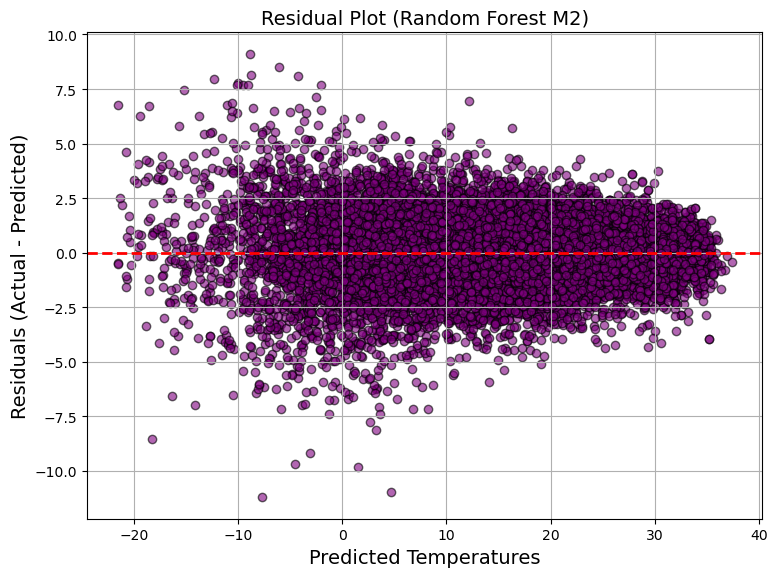

Metrics for Random Forest M2:
  Mean Absolute Error (MAE): 0.7741
  Median Absolute Error (MedAE): 0.5005
  Mean Squared Error (MSE): 1.3284
  Root Mean Squared Error (RMSE): 1.1526
  R² Score: 0.9857


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import pickle
import matplotlib.pyplot as plt
import numpy as np

model_name = "Random Forest M2"

# Dynamically select all one-hot encoded Country columns
country_columns = [col for col in df.columns if col.startswith('Country_')]

# Define features and target
features = ['Year', 'Latitude', 'Longitude', 'Month'] + country_columns
X = df[features]  # Include all selected features
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title(f"Actual vs Predicted Temperatures ({model_name})")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.grid(True)
save_fig(f"Actual_vs_Predicted_{model_name.replace(' ', '_')}")
plt.show()

# Plot histogram for predicted temperatures
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=25, alpha=0.7, label="Predicted", color='skyblue', edgecolor='black')
plt.hist(y_test, bins=25, alpha=0.5, label="Actual", color='orange', edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Distribution of Predicted vs Actual Temperatures ({model_name})")
plt.legend()
save_fig(f"Histogram_{model_name.replace(' ', '_')}")
plt.show()

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title(f"Residual Plot ({model_name})")
plt.xlabel("Predicted Temperatures")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
save_fig(f"Residuals_{model_name.replace(' ', '_')}")
plt.show()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
med_ae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

model_scores[model_name] = {
    "MAE": mae,
    "MedAE": med_ae,
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

# Print metrics
print(f"Metrics for {model_name}:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Median Absolute Error (MedAE): {med_ae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R² Score: {r2:.4f}")

## Building and Training a Support Vector Regression (SVR) Model

After testing with simpler models like Linear Regression and Random Forest, we will now explore **Support Vector Regression (SVR)**, a robust and flexible algorithm capable of handling both linear and nonlinear relationships. The target variable is still `AverageTemperature`.

### Why Support Vector Regression?
- **Effective for Nonlinear Relationships**: SVR uses kernels (for example rbf, poly and linear) to map data into a higher-dimensional space, allowing it to capture complex patterns.
- **Robust to Outliers**: By introducing a margin of tolerance (`epsilon`), SVR focuses on the most relevant data points (support vectors) and ignores small deviations.
- **Generalization**: SVR aims to strike a balance between model complexity and prediction accuracy, reducing the risk of overfitting.

### Key Considerations
- **Feature Scaling**: SVR is sensitive to feature magnitudes, so scaling features (here with `StandardScaler`) is essential for optimal performance.
- **Training Time**: SVR can be computationally expensive for large datasets due to its quadratic or cubic time complexity, especially with nonlinear kernels.
- **Feature Selection**: Different features sets were tested for each model.

#### Testing rbf kernel

In [49]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_name = "SVR M1"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to scale data
model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1, degree=3))

# Fit the model
model.fit(X_train, y_train)

# Save the model to disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the SVR model: {result:.4f}")

R² Score of the SVR model: 0.9179


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_SVR_M1.png


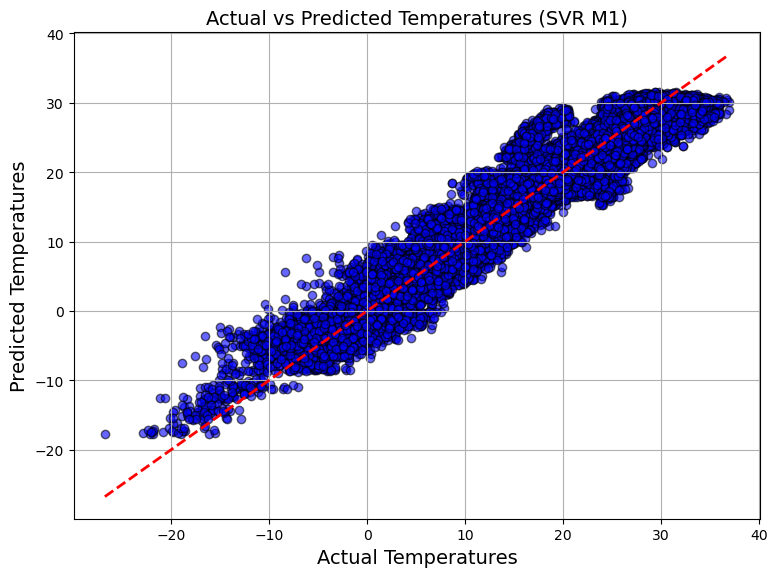

Saving figure to ../reports/figures/Histogram_SVR_M1.png


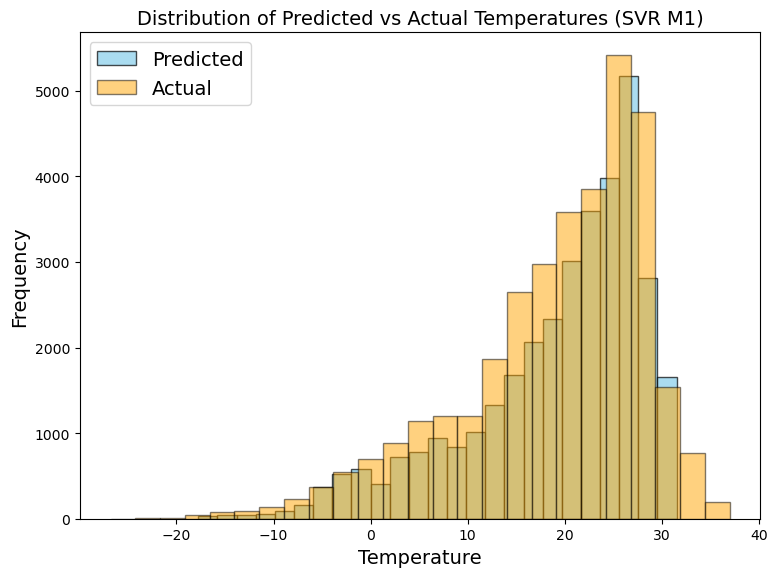

Saving figure to ../reports/figures/Residuals_SVR_M1.png


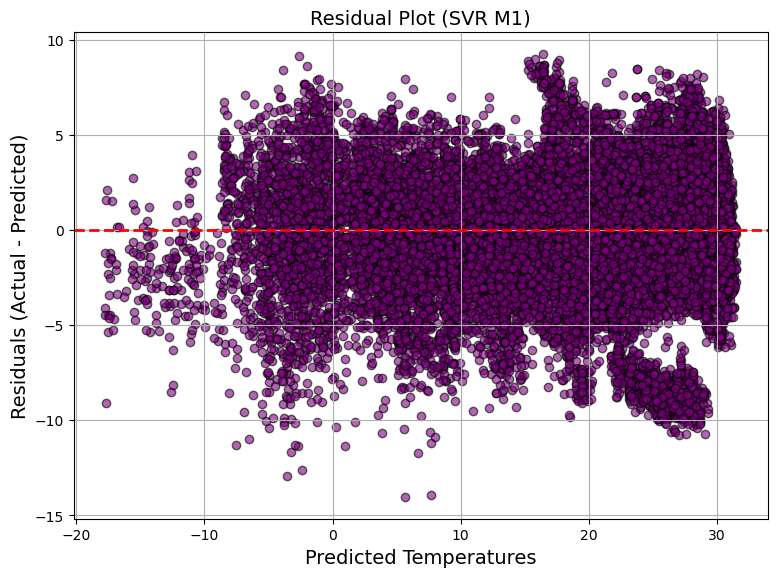

Metrics for SVR M1:
  Mean Absolute Error (MAE): 2.0081
  Median Absolute Error (MedAE): 1.4573
  Mean Squared Error (MSE): 7.6086
  Root Mean Squared Error (RMSE): 2.7584
  R² Score: 0.9179


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import pickle
import matplotlib.pyplot as plt
import numpy as np

model_name = "SVR M1"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title(f"Actual vs Predicted Temperatures ({model_name})")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.grid(True)
save_fig(f"Actual_vs_Predicted_{model_name.replace(' ', '_')}")
plt.show()

# Plot histogram for predicted temperatures
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=25, alpha=0.7, label="Predicted", color='skyblue', edgecolor='black')
plt.hist(y_test, bins=25, alpha=0.5, label="Actual", color='orange', edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Distribution of Predicted vs Actual Temperatures ({model_name})")
plt.legend()
save_fig(f"Histogram_{model_name.replace(' ', '_')}")
plt.show()

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title(f"Residual Plot ({model_name})")
plt.xlabel("Predicted Temperatures")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
save_fig(f"Residuals_{model_name.replace(' ', '_')}")
plt.show()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
med_ae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

model_scores[model_name] = {
    "MAE": mae,
    "MedAE": med_ae,
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

# Print metrics
print(f"Metrics for {model_name}:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Median Absolute Error (MedAE): {med_ae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R² Score: {r2:.4f}")

#### Testing poly kernel

In [69]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_name = "SVR M2"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to scale data
model = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1.0, epsilon=0.1, degree=3))

# Fit the model
model.fit(X_train, y_train)

# Save the model to disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the SVR model: {result:.4f}")

R² Score of the SVR model: 0.3741


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_SVR_M2.png


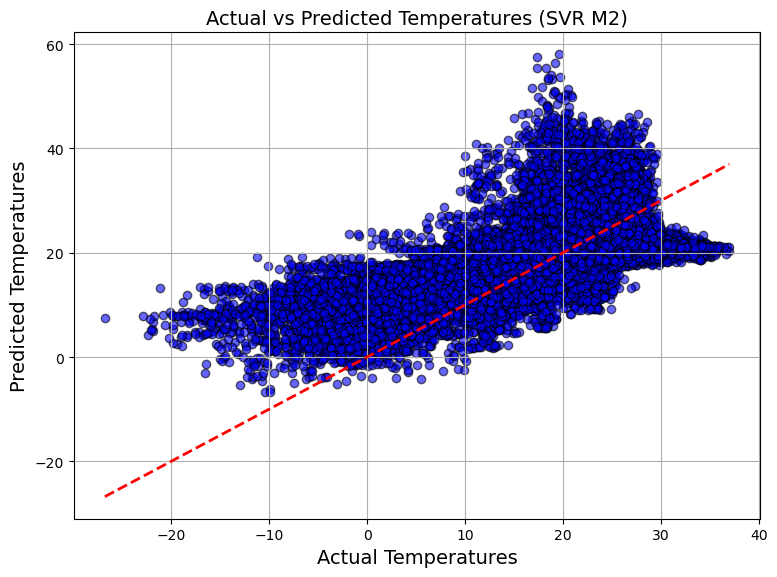

Saving figure to ../reports/figures/Histogram_SVR_M2.png


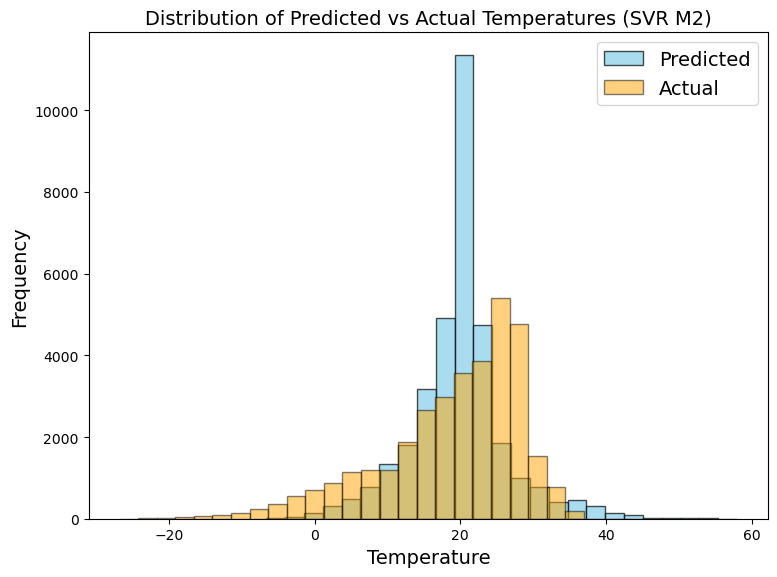

Saving figure to ../reports/figures/Residuals_SVR_M2.png


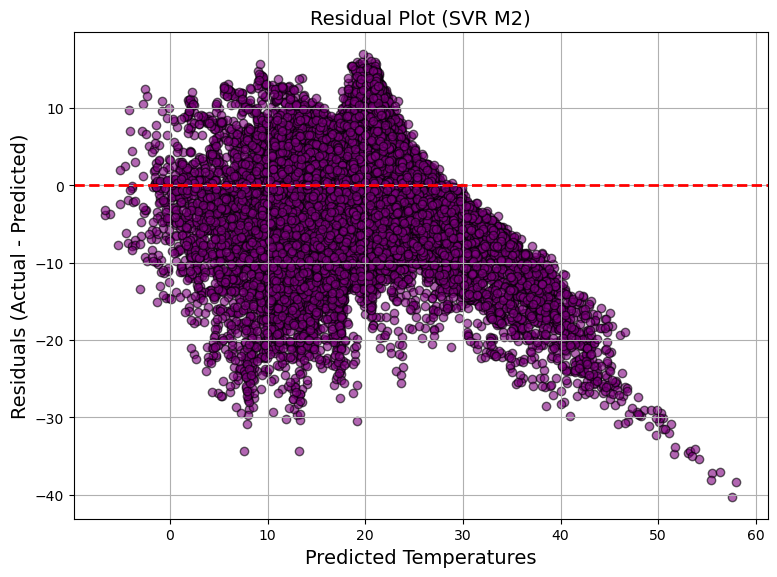

Metrics for SVR M2:
  Mean Absolute Error (MAE): 5.9241
  Median Absolute Error (MedAE): 4.9484
  Mean Squared Error (MSE): 58.0018
  Root Mean Squared Error (RMSE): 7.6159
  R² Score: 0.3741


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import pickle
import matplotlib.pyplot as plt
import numpy as np

model_name = "SVR M2"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title(f"Actual vs Predicted Temperatures ({model_name})")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.grid(True)
save_fig(f"Actual_vs_Predicted_{model_name.replace(' ', '_')}")
plt.show()

# Plot histogram for predicted temperatures
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=25, alpha=0.7, label="Predicted", color='skyblue', edgecolor='black')
plt.hist(y_test, bins=25, alpha=0.5, label="Actual", color='orange', edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Distribution of Predicted vs Actual Temperatures ({model_name})")
plt.legend()
save_fig(f"Histogram_{model_name.replace(' ', '_')}")
plt.show()

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title(f"Residual Plot ({model_name})")
plt.xlabel("Predicted Temperatures")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
save_fig(f"Residuals_{model_name.replace(' ', '_')}")
plt.show()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
med_ae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

model_scores[model_name] = {
    "MAE": mae,
    "MedAE": med_ae,
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

# Print metrics
print(f"Metrics for {model_name}:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Median Absolute Error (MedAE): {med_ae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R² Score: {r2:.4f}")

#### Testing linear kernel

In [72]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_name = "SVR M3"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to scale data
model = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1.0, epsilon=0.1, degree=3))

# Fit the model
model.fit(X_train, y_train)

# Save the model to disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the SVR (linear kernel) model: {result:.4f}")

R² Score of the SVR (linear kernel) model: 0.0835


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_SVR_M3.png


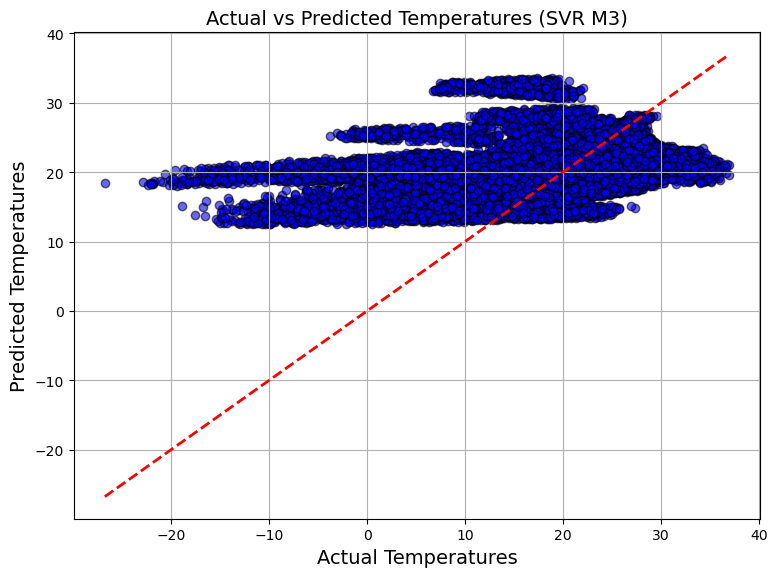

Saving figure to ../reports/figures/Histogram_SVR_M3.png


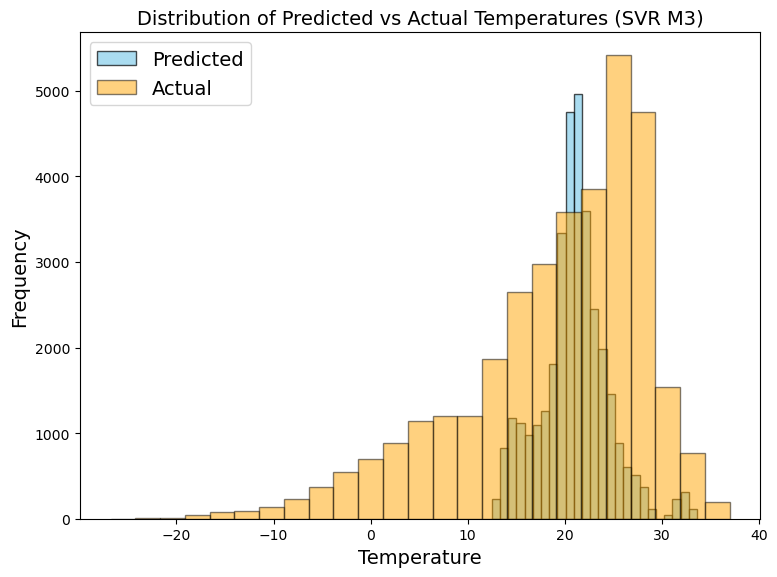

Saving figure to ../reports/figures/Residuals_SVR_M3.png


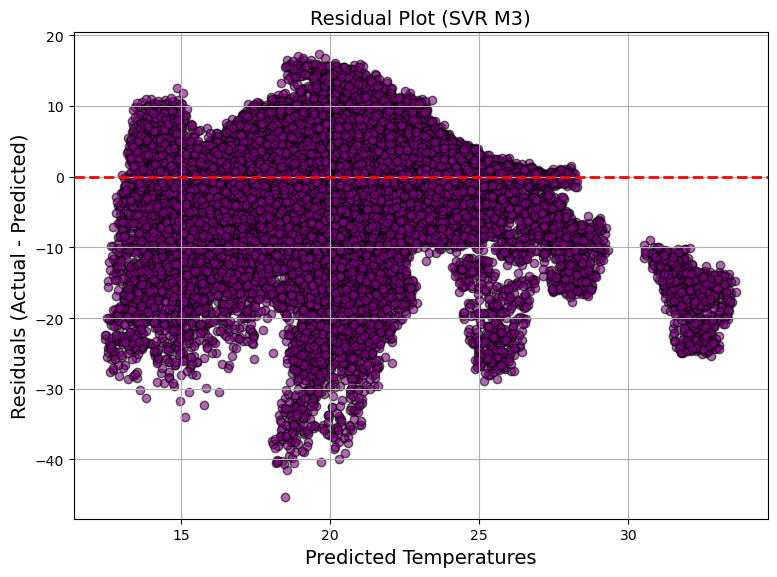

Metrics for SVR M3:
  Mean Absolute Error (MAE): 6.8501
  Median Absolute Error (MedAE): 5.1715
  Mean Squared Error (MSE): 84.9333
  Root Mean Squared Error (RMSE): 9.2159
  R² Score: 0.0835


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import pickle
import matplotlib.pyplot as plt
import numpy as np

model_name = "SVR M3"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title(f"Actual vs Predicted Temperatures ({model_name})")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.grid(True)
save_fig(f"Actual_vs_Predicted_{model_name.replace(' ', '_')}")
plt.show()

# Plot histogram for predicted temperatures
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=25, alpha=0.7, label="Predicted", color='skyblue', edgecolor='black')
plt.hist(y_test, bins=25, alpha=0.5, label="Actual", color='orange', edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Distribution of Predicted vs Actual Temperatures ({model_name})")
plt.legend()
save_fig(f"Histogram_{model_name.replace(' ', '_')}")
plt.show()

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title(f"Residual Plot ({model_name})")
plt.xlabel("Predicted Temperatures")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
save_fig(f"Residuals_{model_name.replace(' ', '_')}")
plt.show()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
med_ae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

model_scores[model_name] = {
    "MAE": mae,
    "MedAE": med_ae,
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

# Print metrics
print(f"Metrics for {model_name}:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Median Absolute Error (MedAE): {med_ae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R² Score: {r2:.4f}")

#### Testing LinearSVR

In [74]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pickle

model_name = "Linear SVR M1"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to scale data (LinearSVR is sensitive to feature scales)
model = make_pipeline(StandardScaler(), LinearSVR(C=1.0, epsilon=0.5, dual=True, max_iter=10000, random_state=42))

# Fit the model
model.fit(X_train, y_train)

# Save the model to disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate the loaded model on the test set
result = loaded_model.score(X_test, y_test)  # R² score for regression tasks
print(f"R² Score of the LinearSVR model: {result:.4f}")

R² Score of the LinearSVR model: 0.0835


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_Linear_SVR_M1.png


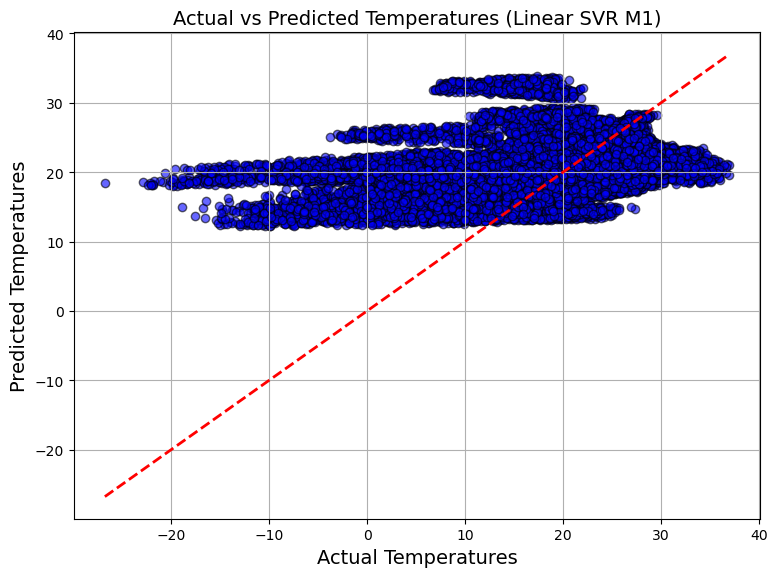

Saving figure to ../reports/figures/Histogram_Linear_SVR_M1.png


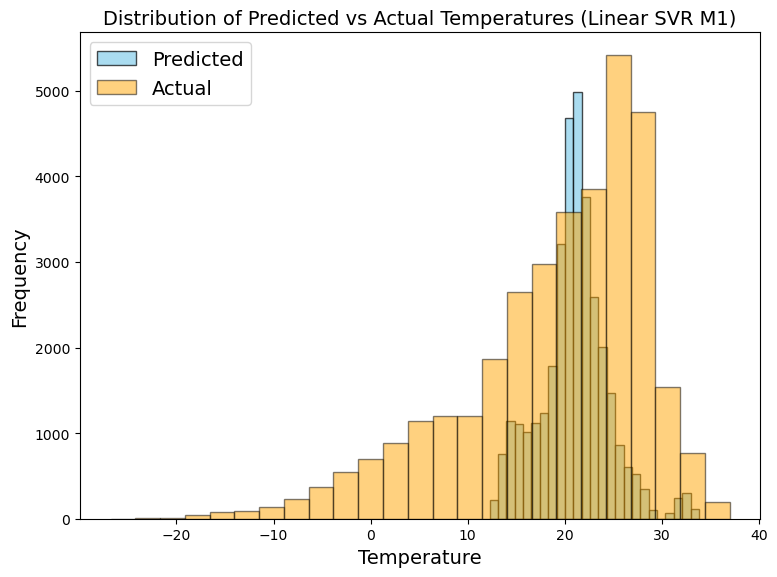

Saving figure to ../reports/figures/Residuals_Linear_SVR_M1.png


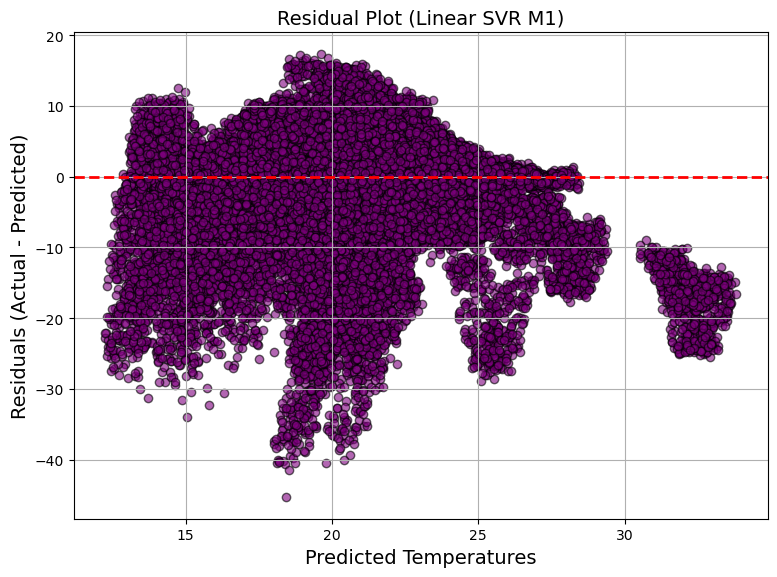

Metrics for Linear SVR M1:
  Mean Absolute Error (MAE): 6.8504
  Median Absolute Error (MedAE): 5.1649
  Mean Squared Error (MSE): 84.9363
  Root Mean Squared Error (RMSE): 9.2161
  R² Score: 0.0835


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import pickle
import matplotlib.pyplot as plt
import numpy as np

model_name = "Linear SVR M1"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title(f"Actual vs Predicted Temperatures ({model_name})")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.grid(True)
save_fig(f"Actual_vs_Predicted_{model_name.replace(' ', '_')}")
plt.show()

# Plot histogram for predicted temperatures
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=25, alpha=0.7, label="Predicted", color='skyblue', edgecolor='black')
plt.hist(y_test, bins=25, alpha=0.5, label="Actual", color='orange', edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Distribution of Predicted vs Actual Temperatures ({model_name})")
plt.legend()
save_fig(f"Histogram_{model_name.replace(' ', '_')}")
plt.show()

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title(f"Residual Plot ({model_name})")
plt.xlabel("Predicted Temperatures")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
save_fig(f"Residuals_{model_name.replace(' ', '_')}")
plt.show()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
med_ae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

model_scores[model_name] = {
    "MAE": mae,
    "MedAE": med_ae,
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

# Print metrics
print(f"Metrics for {model_name}:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Median Absolute Error (MedAE): {med_ae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R² Score: {r2:.4f}")

## Building and Training a K-Nearest Neighbors (KNN) Model

### Why KNN?
- **Non-parametric and Flexible**: KNN makes no explicit assumption about the underlying data distribution, making it well-suited for capturing patterns in diverse datasets.
- **Simple to Understand and Implement**: KNN is straightforward—it relies on measuring the distance between data points and uses the average of the `k` nearest neighbors to predict the target variable.
- **Adaptability to Data Complexity**: By tuning the number of neighbors (`k`), KNN can balance between underfitting (low `k`) and overfitting (high `k`) for better generalization.
- **Effective for Local Patterns**: KNN excels at identifying local trends in the data, making it particularly useful for problems where relationships vary across regions of the input space.

### Key Considerations
- **Computational Efficiency**: KNN can be computationally expensive for large datasets as it needs to compute distances to all points in the training set during predictions.


In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle

model_name = "KNN M1"

# Define features and target
X = df[['Year', 'Month', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scikitlearn_knn = KNeighborsRegressor(n_neighbors=5)
scikitlearn_knn.fit(X_train, y_train)
y_pred = scikitlearn_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("knn mean squared error: ", mse)

# Save the model to disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
pickle.dump(scikitlearn_knn, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the KNN model: {result:.4f}")

knn mean squared error:  2.7303346931541275
R² Score of the KNN model: 0.9705


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_KNN_M1.png


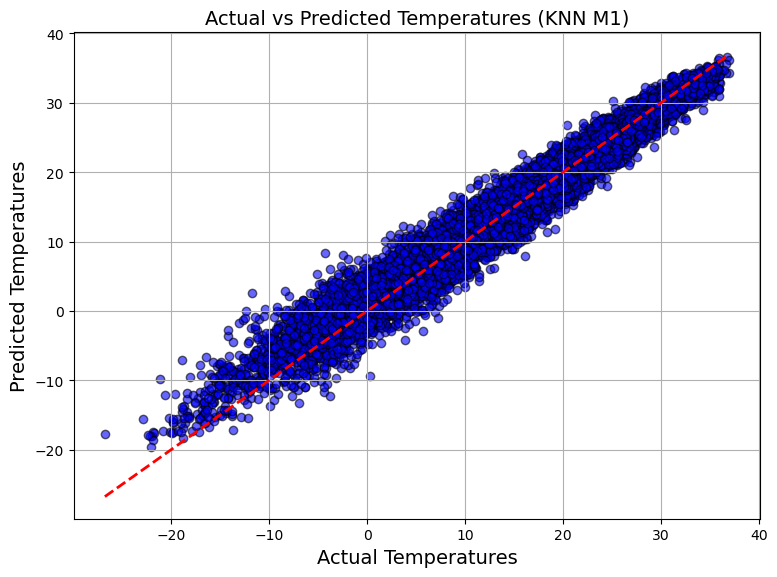

Saving figure to ../reports/figures/Histogram_KNN_M1.png


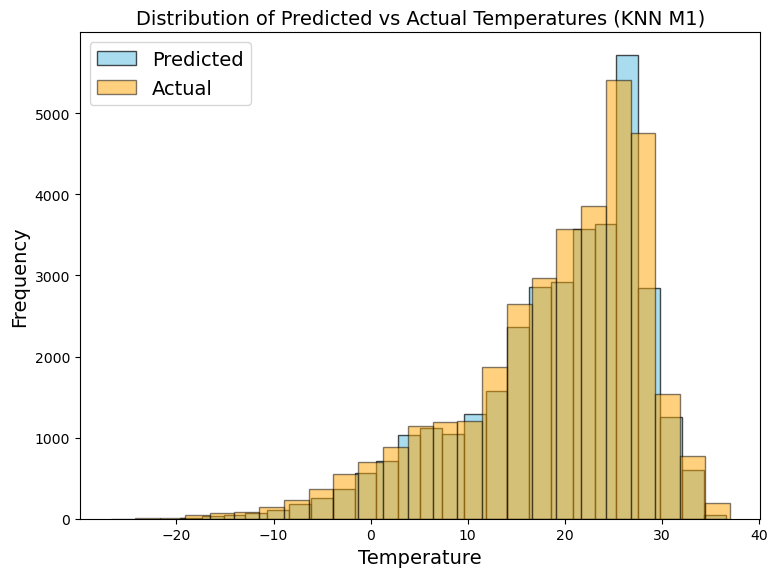

Saving figure to ../reports/figures/Residuals_KNN_M1.png


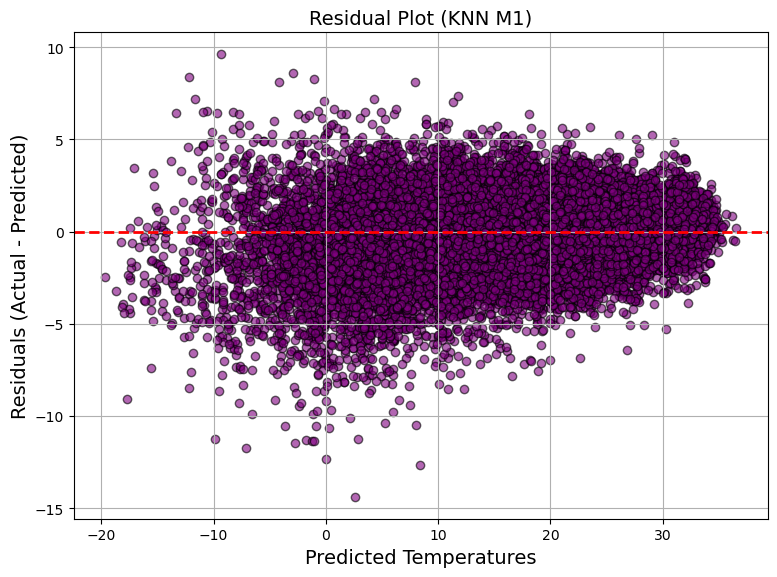

Metrics for KNN M1:
  Mean Absolute Error (MAE): 1.1471
  Median Absolute Error (MedAE): 0.7736
  Mean Squared Error (MSE): 2.7303
  Root Mean Squared Error (RMSE): 1.6524
  R² Score: 0.9705


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import pickle
import matplotlib.pyplot as plt
import numpy as np

model_name = "KNN M1"

# Define features and target
X = df[['Year', 'Month', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title(f"Actual vs Predicted Temperatures ({model_name})")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.grid(True)
save_fig(f"Actual_vs_Predicted_{model_name.replace(' ', '_')}")
plt.show()

# Plot histogram for predicted temperatures
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=25, alpha=0.7, label="Predicted", color='skyblue', edgecolor='black')
plt.hist(y_test, bins=25, alpha=0.5, label="Actual", color='orange', edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Distribution of Predicted vs Actual Temperatures ({model_name})")
plt.legend()
save_fig(f"Histogram_{model_name.replace(' ', '_')}")
plt.show()

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title(f"Residual Plot ({model_name})")
plt.xlabel("Predicted Temperatures")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
save_fig(f"Residuals_{model_name.replace(' ', '_')}")
plt.show()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
med_ae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

model_scores[model_name] = {
    "MAE": mae,
    "MedAE": med_ae,
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

# Print metrics
print(f"Metrics for {model_name}:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Median Absolute Error (MedAE): {med_ae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R² Score: {r2:.4f}")

#### Testing with fewer features

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle

model_name = "KNN M2"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scikitlearn_knn = KNeighborsRegressor(n_neighbors=5)
scikitlearn_knn.fit(X_train, y_train)
y_pred = scikitlearn_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("knn mean squared error: ", mse)

# Save the model to disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
pickle.dump(scikitlearn_knn, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the KNN model: {result:.4f}")

knn mean squared error:  52.9440752986729
R² Score of the KNN model: 0.4287


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_KNN_M2.png


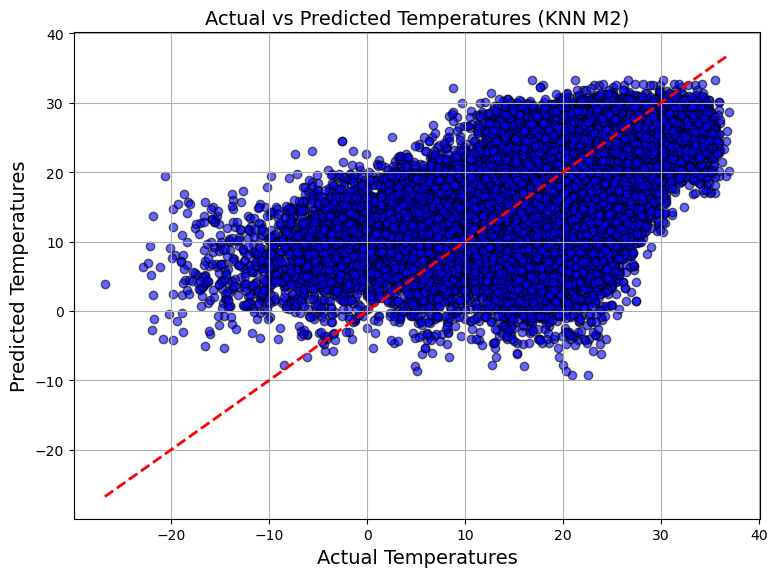

Saving figure to ../reports/figures/Histogram_KNN_M2.png


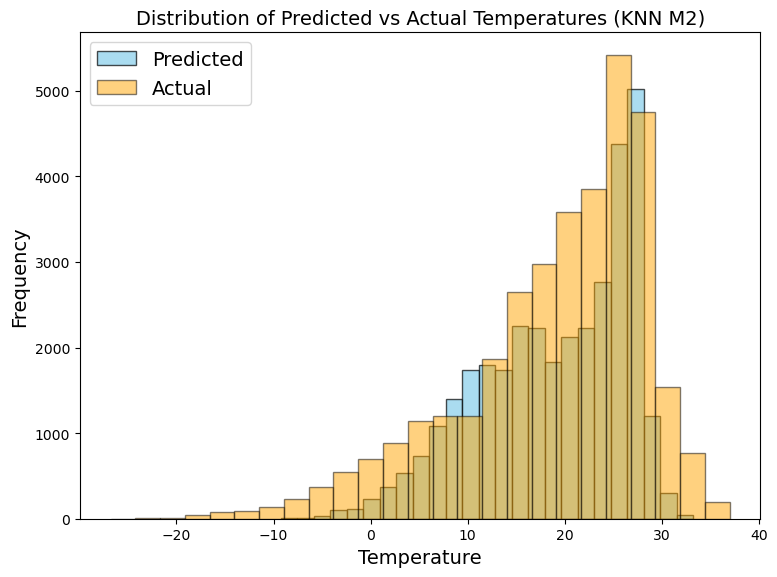

Saving figure to ../reports/figures/Residuals_KNN_M2.png


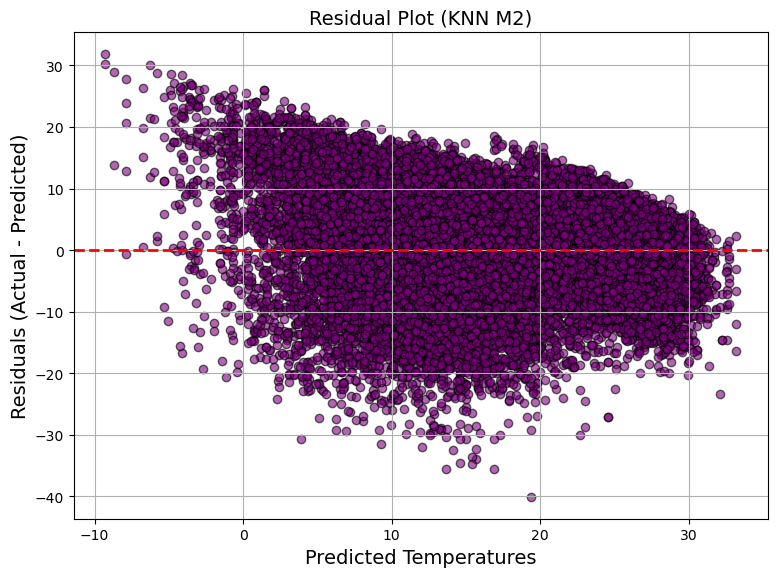

Metrics for KNN M2:
  Mean Absolute Error (MAE): 5.2274
  Median Absolute Error (MedAE): 3.4834
  Mean Squared Error (MSE): 52.9441
  Root Mean Squared Error (RMSE): 7.2763
  R² Score: 0.4287


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import pickle
import matplotlib.pyplot as plt
import numpy as np

model_name = "KNN M2"

# Define features and target
X = df[['Year', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = f'../models/{model_name.replace(" ", "_")}.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title(f"Actual vs Predicted Temperatures ({model_name})")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.grid(True)
save_fig(f"Actual_vs_Predicted_{model_name.replace(' ', '_')}")
plt.show()

# Plot histogram for predicted temperatures
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=25, alpha=0.7, label="Predicted", color='skyblue', edgecolor='black')
plt.hist(y_test, bins=25, alpha=0.5, label="Actual", color='orange', edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Distribution of Predicted vs Actual Temperatures ({model_name})")
plt.legend()
save_fig(f"Histogram_{model_name.replace(' ', '_')}")
plt.show()

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title(f"Residual Plot ({model_name})")
plt.xlabel("Predicted Temperatures")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
save_fig(f"Residuals_{model_name.replace(' ', '_')}")
plt.show()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
med_ae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

model_scores[model_name] = {
    "MAE": mae,
    "MedAE": med_ae,
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

# Print metrics
print(f"Metrics for {model_name}:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Median Absolute Error (MedAE): {med_ae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R² Score: {r2:.4f}")

## Compare Models

In [117]:
import pandas as pd

# Convert dictionary to DataFrame
results_df = pd.DataFrame.from_dict(model_scores, orient="index")
results_df.reset_index(inplace=True)  # Move model names to a column
results_df.rename(columns={"index": "Model"}, inplace=True)

# Display the DataFrame
print(results_df)

                  Model       MAE     MedAE        MSE      RMSE        R²
0                KNN M2  5.227438  3.483400  52.944075  7.276268  0.428712
1  Linear Regression M1  7.084189  6.030678  79.784603  8.932223  0.139092
2  Linear Regression M2  7.130036  6.091063  80.700227  8.983331  0.129212
3      Random Forest M1  0.774988  0.502800   1.325824  1.151444  0.985694
4      Random Forest M2  0.774105  0.500540   1.328410  1.152567  0.985666
5                SVR M1  2.008127  1.457278   7.608614  2.758372  0.917900
6                KNN M1  1.147077  0.773600   2.730335  1.652372  0.970539
7                SVR M2  5.924080  4.948427  58.001774  7.615890  0.374138
8                SVR M3  6.850075  5.171502  84.933262  9.215924  0.083536
9         Linear SVR M1  6.850443  5.164904  84.936271  9.216088  0.083503


In [118]:
# Sort by R² (descending) and MAE (ascending)
results_df = results_df.sort_values(by=["R²", "MAE"], ascending=[False, True])
print(results_df)

                  Model       MAE     MedAE        MSE      RMSE        R²
3      Random Forest M1  0.774988  0.502800   1.325824  1.151444  0.985694
4      Random Forest M2  0.774105  0.500540   1.328410  1.152567  0.985666
6                KNN M1  1.147077  0.773600   2.730335  1.652372  0.970539
5                SVR M1  2.008127  1.457278   7.608614  2.758372  0.917900
0                KNN M2  5.227438  3.483400  52.944075  7.276268  0.428712
7                SVR M2  5.924080  4.948427  58.001774  7.615890  0.374138
1  Linear Regression M1  7.084189  6.030678  79.784603  8.932223  0.139092
2  Linear Regression M2  7.130036  6.091063  80.700227  8.983331  0.129212
8                SVR M3  6.850075  5.171502  84.933262  9.215924  0.083536
9         Linear SVR M1  6.850443  5.164904  84.936271  9.216088  0.083503


Saving figure to ../reports/figures/Comparison_MAE.png


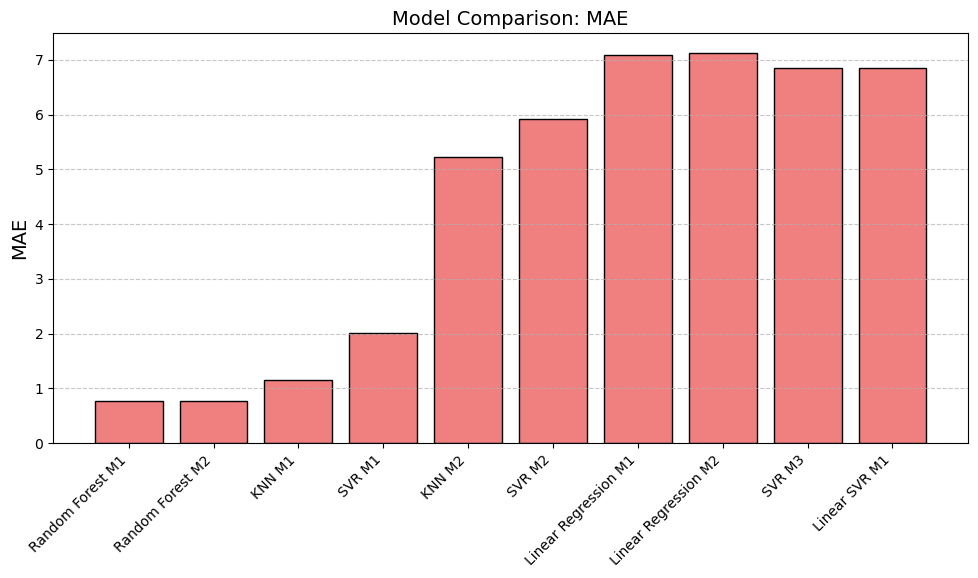

Saving figure to ../reports/figures/Comparison_MedAE.png


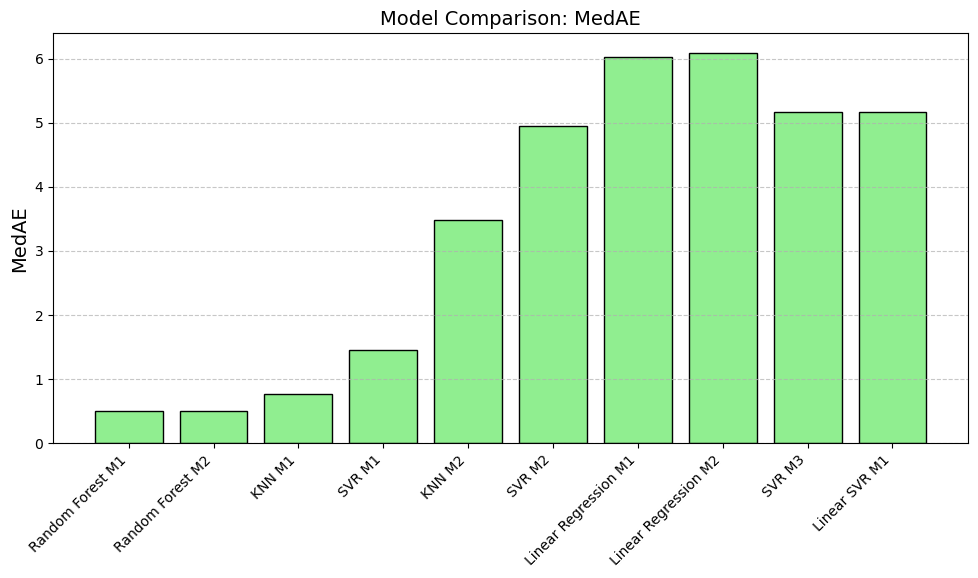

Saving figure to ../reports/figures/Comparison_MSE.png


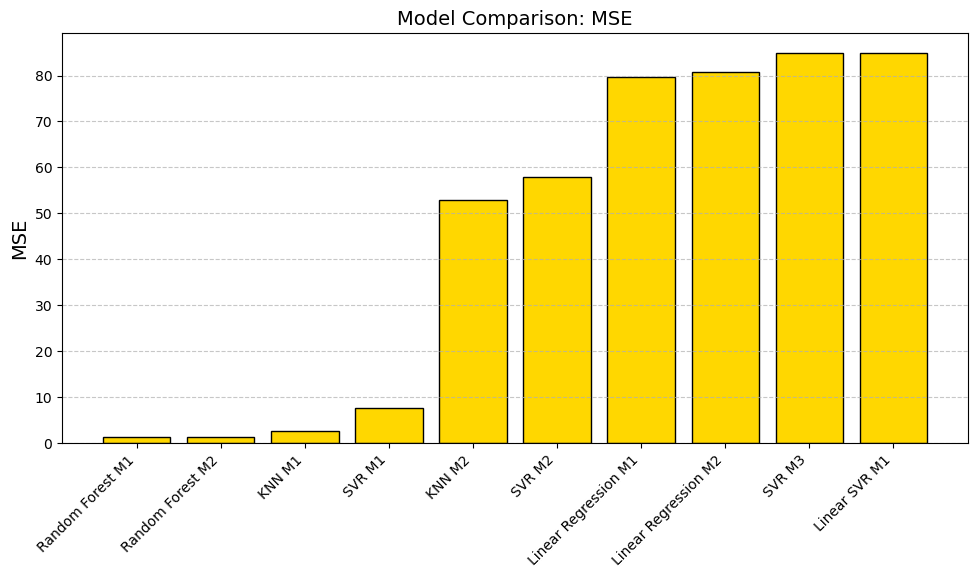

Saving figure to ../reports/figures/Comparison_RMSE.png


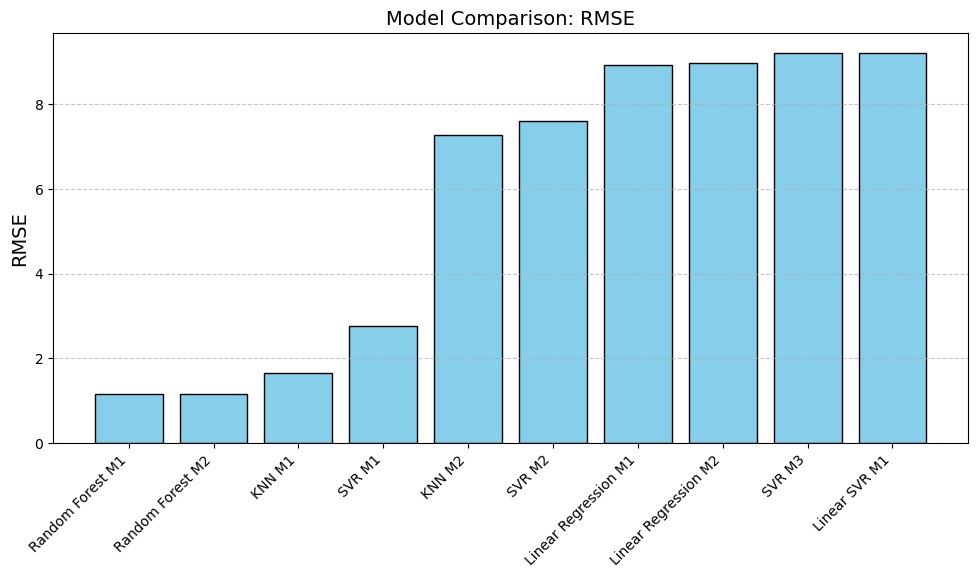

Saving figure to ../reports/figures/Comparison_R².png


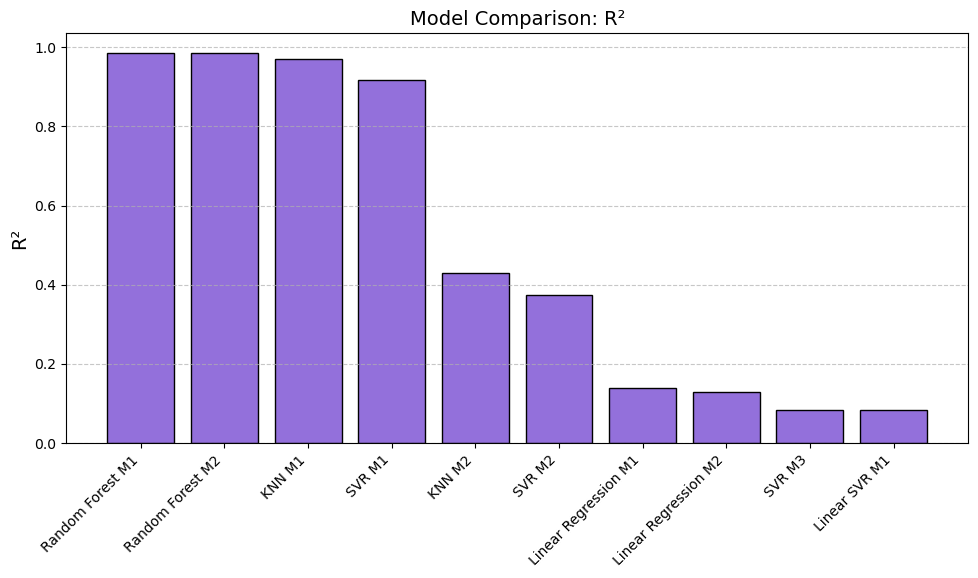

In [119]:
import matplotlib.pyplot as plt

# Define metrics to plot
metrics = ["MAE", "MedAE", "MSE", "RMSE", "R²"]
colors = ["lightcoral", "lightgreen", "gold", "skyblue", "mediumpurple"]

for metric, color in zip(metrics, colors):
    plt.figure(figsize=(10, 6))
    plt.bar(results_df["Model"], results_df[metric], color=color, edgecolor="black")
    plt.ylabel(metric)
    plt.title(f"Model Comparison: {metric}")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    save_fig(f"Comparison_{metric.replace(' ', '_')}")
    plt.show()

Saving figure to ../reports/figures/Models Performance Metrics Heatmap.png


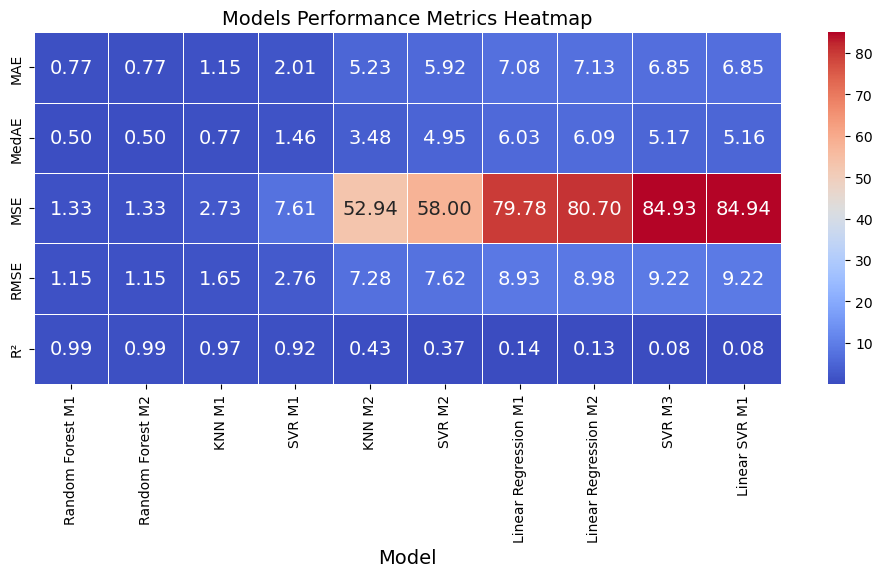

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index("Model").T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Models Performance Metrics Heatmap")
save_fig("Models Performance Metrics Heatmap")
plt.show()

Our best model is Random Forest M1 which is our random forest model excludng the one hot encoded variable for country

Saving figure to ../reports/figures/Top Models Comparison Across All Metrics.png


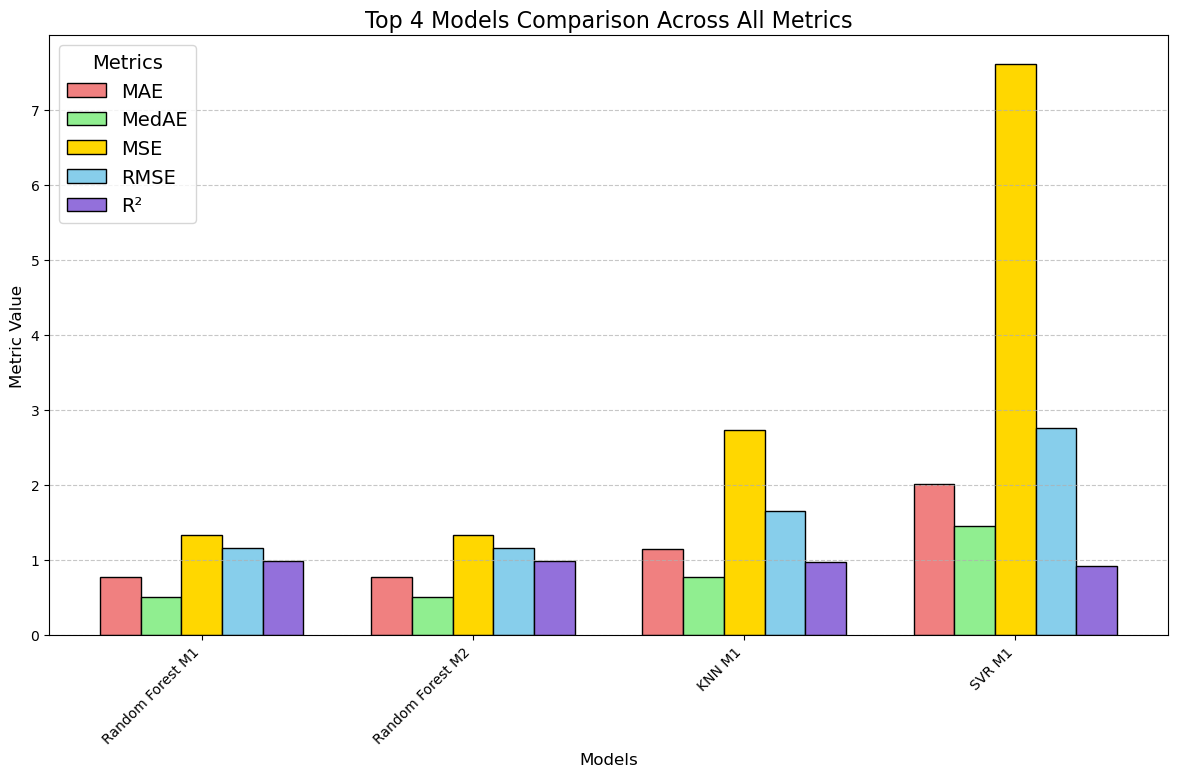

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Select the top 4 models
top_n = 4
top_results_df = results_df.head(top_n)

# Prepare data for grouped bar chart
metrics = ["MAE", "MedAE", "MSE", "RMSE", "R²"]
models = top_results_df["Model"]
num_metrics = len(metrics)
num_models = len(models)

# Create positions for the groups and bars
bar_width = 0.15
x = np.arange(num_models)  # Positions for the models
colors = ["lightcoral", "lightgreen", "gold", "skyblue", "mediumpurple"]

# Plot grouped bars
fig, ax = plt.subplots(figsize=(12, 8))

for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, top_results_df[metric], bar_width, label=metric, color=colors[i], edgecolor="black")

# Add labels, title, and legend
ax.set_xticks(x + bar_width * (num_metrics - 1) / 2)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
ax.set_title(f"Top {top_n} Models Comparison Across All Metrics", fontsize=16)
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Metric Value", fontsize=12)
ax.legend(title="Metrics")
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
save_fig("Top Models Comparison Across All Metrics")
plt.show()

Saving figure to ../reports/figures/Multi Line Chart for All Models.png


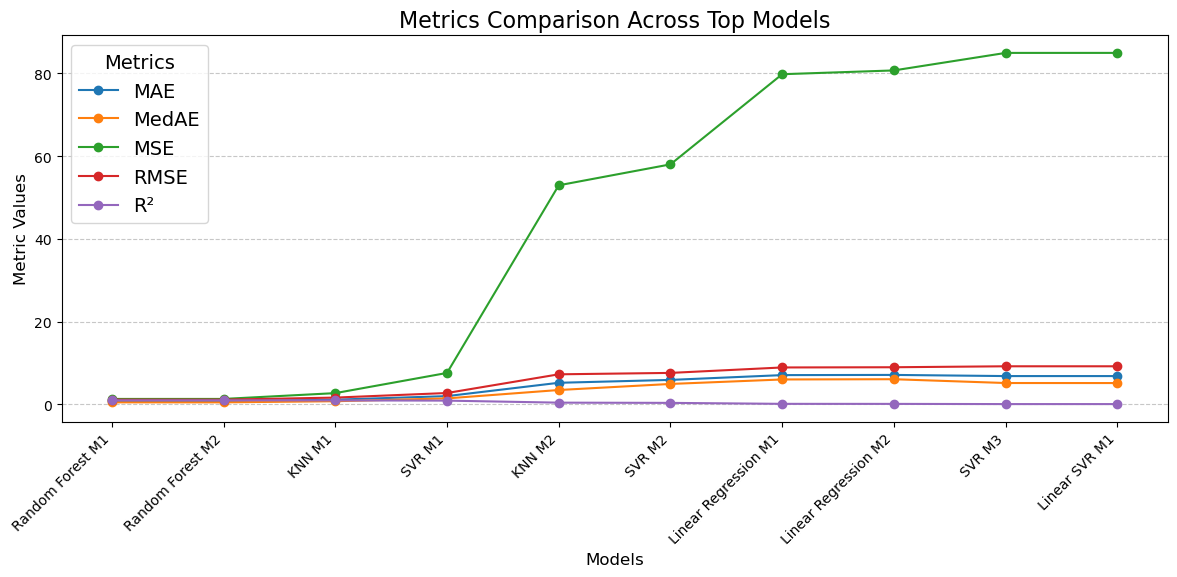

In [127]:
import matplotlib.pyplot as plt

# Filter the top 10 models
top_n = 10
top_models_df = results_df.head(top_n)

# List of metrics to plot (excluding "Model" column)
metrics = ["MAE", "MedAE", "MSE", "RMSE", "R²"]

# Plot all metrics for the top models
plt.figure(figsize=(12, 6))

# Loop through metrics and plot each as a separate line
for metric in metrics:
    plt.plot(top_models_df["Model"], top_models_df[metric], marker="o", label=metric)

# Customize plot
plt.title("Metrics Comparison Across Top Models", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Metric Values", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
save_fig("Multi Line Chart for All Models")
plt.show()

Saving figure to ../reports/figures/Multi Line Chart for Top 4 Models.png


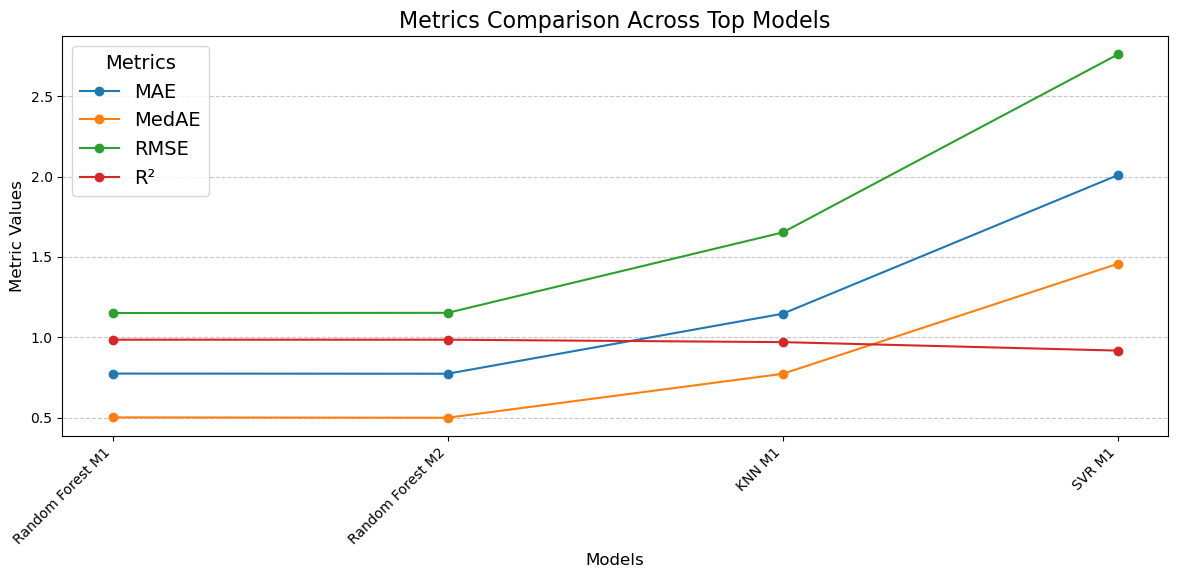

In [128]:
import matplotlib.pyplot as plt

# Filter the top 4 models
top_n = 4
top_models_df = results_df.head(top_n)

# List of metrics to plot (excluding "Model" column)
metrics = ["MAE", "MedAE", "RMSE", "R²"]

# Plot all metrics for the top models
plt.figure(figsize=(12, 6))

# Loop through metrics and plot each as a separate line
for metric in metrics:
    plt.plot(top_models_df["Model"], top_models_df[metric], marker="o", label=metric)

# Customize plot
plt.title("Metrics Comparison Across Top Models", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Metric Values", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
save_fig("Multi Line Chart for Top 4 Models") 
plt.show()

## Cross-Validation
Testing with cross-validation for the best performing setups.

Cross-Validation Results:
KNN: Mean R² Score = 0.7974 | Scores = [0.84279225 0.84883739 0.7973617  0.86193968 0.63612379]
RandomForest: Mean R² Score = 0.8027 | Scores = [0.89442868 0.85661642 0.8878297  0.8597865  0.5147409 ]
LinearRegression: Mean R² Score = 0.0512 | Scores = [ 0.15956391  0.19261963  0.11024208 -0.02494645 -0.18124992]


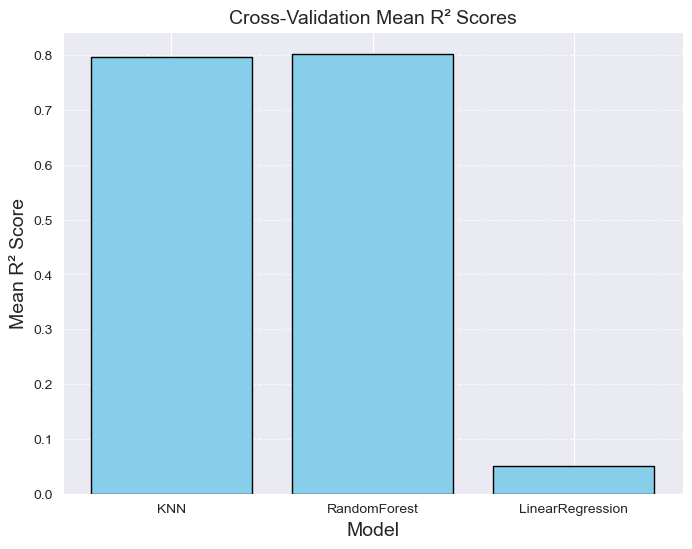

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Define classifiers to test
classifiers = {
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LinearRegression": LinearRegression(),
}

# Initialize results storage
cross_val_results = {}

# Perform cross-validation for each model
for name, model in classifiers.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cross_val_results[name] = {"mean_score": cv_scores.mean(), "scores": cv_scores}

# Display cross-validation results
print("Cross-Validation Results:")
for name, results in cross_val_results.items():
    print(f"{name}: Mean R² Score = {results['mean_score']:.4f} | Scores = {results['scores']}")

model_names = list(cross_val_results.keys())
mean_scores = [cross_val_results[name]["mean_score"] for name in model_names]

plt.figure(figsize=(8, 6))
plt.bar(model_names, mean_scores, color='skyblue', edgecolor='black')
plt.title("Cross-Validation Mean R² Scores")
plt.xlabel("Model")
plt.ylabel("Mean R² Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
save_fig("Cross-Validation Mean R² Scores")

# Predict Future Values
Use the best classifiers to predict future values

In [34]:
import pickle

def test_all_models(model_names, future_input, df):
    predictions = {}

    for model_name in model_names:
        # Define the model file path
        filename = f'../models/{model_name.replace(" ", "_")}.sav'
        
        try:
            # Load the model from disk
            loaded_model = pickle.load(open(filename, 'rb'))
            
             # Ensure future_input is a DataFrame with valid feature names
            feature_names = ['Year', 'Latitude', 'Longitude', 'Month']  # Replace with actual feature names used for training
            future_input_df = pd.DataFrame(future_input, columns=feature_names)
            
            # Predict with the future input
            future_prediction = loaded_model.predict(future_input_df)[0]
            
            # Store the prediction
            predictions[model_name] = future_prediction
            print(f"{model_name}: Predicted Temperature = {future_prediction:.2f}")
        except FileNotFoundError:
            print(f"Model file '{filename}' not found.")
            predictions[model_name] = None

    return predictions

# Add all models to be tested
model_names = ["KNN M1", "Random Forest M1", "Linear Regression M1", "SVR M1"] 
future_input = [[2024, 33.879914, -117.928749, 11]]  # Coordinates for Fullerton
predictions = test_all_models(model_names, future_input, df)

# Print predictions
print("\nPredictions for all models:")
for model, prediction in predictions.items():
    if prediction is not None:
        print(f"{model}: {prediction:.2f}")
    else:
        print(f"{model}: Prediction not available (model file missing).")

Feature names must be in the same order as they were in fit.

KNN M1: Predicted Temperature = 19.01
Random Forest M1: Predicted Temperature = 13.42
Linear Regression M1: Predicted Temperature = 16.30
SVR M1: Predicted Temperature = 12.37

Predictions for all models:
KNN M1: 19.01
Random Forest M1: 13.42
Linear Regression M1: 16.30
SVR M1: 12.37
